# CyberSentryAI - CIC-IDS-2017 Dataset Analysis

This notebook explores, cleans, analyzes, and preprocesses the CIC-IDS-2017 dataset for building an AI-based Intrusion Detection System (IDS).


## 1. Environment Setup and Imports


In [1]:
# Our version of Google Colab drive mount - using local data directory
import os
os.chdir('/Users/gabegiancarlo/Projects/CPSC-351/CyberSentryAI')
print(f"Current working directory: {os.getcwd()}")

# Check both possible paths for the data directory
path1 = 'data/raw/GeneratedLabelledFlows/TrafficLabelling '
path2 = 'data/raw/GeneratedLabelledFlows/TrafficLabelling/'

print(f"Data directory (with space) exists: {os.path.exists(path1)}")
print(f"Data directory (without space) exists: {os.path.exists(path2)}")

# List contents of the GeneratedLabelledFlows directory
flows_dir = 'data/raw/GeneratedLabelledFlows/'
if os.path.exists(flows_dir):
    print(f"\nContents of {flows_dir}:")
    for item in os.listdir(flows_dir):
        print(f"  - {item}")
else:
    print(f"Directory {flows_dir} does not exist!")


Current working directory: /Users/gabegiancarlo/Projects/CPSC-351/CyberSentryAI
Data directory (with space) exists: True
Data directory (without space) exists: False

Contents of data/raw/GeneratedLabelledFlows/:
  - TrafficLabelling 


In [1]:
# Import required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as msno
sns.set(style='darkgrid')
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

print("Libraries imported successfully!")


Libraries imported successfully!


## 2. Loading the Dataset


In [4]:
# Loading the dataset - our version adapted for local paths
# Fix the path issue with the trailing space in directory name
data_path = 'data/raw/GeneratedLabelledFlows/TrafficLabelling /'

print("Loading CIC-IDS-2017 dataset...")
print(f"Data path: {data_path}")

# Check if files exist before loading
import os
files_to_load = [
    'Monday-WorkingHours.pcap_ISCX.csv',
    'Tuesday-WorkingHours.pcap_ISCX.csv', 
    'Wednesday-workingHours.pcap_ISCX.csv',
    'Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv',
    'Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv',
    'Friday-WorkingHours-Morning.pcap_ISCX.csv',
    'Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv',
    'Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv'
]

print("Checking if files exist...")
for file in files_to_load:
    full_path = os.path.join(data_path, file)
    exists = os.path.exists(full_path)
    print(f"  {file}: {'✓' if exists else '✗'}")

# Load the datasets with proper encoding handling
try:
    print("Loading datasets with UTF-8 encoding...")
    data1 = pd.read_csv(os.path.join(data_path, 'Monday-WorkingHours.pcap_ISCX.csv'), encoding='utf-8')
    print("✅ data1 loaded")
    
    data2 = pd.read_csv(os.path.join(data_path, 'Tuesday-WorkingHours.pcap_ISCX.csv'), encoding='utf-8')
    print("✅ data2 loaded")
    
    data3 = pd.read_csv(os.path.join(data_path, 'Wednesday-workingHours.pcap_ISCX.csv'), encoding='utf-8')
    print("✅ data3 loaded")
    
    data4 = pd.read_csv(os.path.join(data_path, 'Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv'), encoding='utf-8')
    print("✅ data4 loaded")
    
    data5 = pd.read_csv(os.path.join(data_path, 'Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv'), encoding='utf-8')
    print("✅ data5 loaded")
    
    data6 = pd.read_csv(os.path.join(data_path, 'Friday-WorkingHours-Morning.pcap_ISCX.csv'), encoding='utf-8')
    print("✅ data6 loaded")
    
    data7 = pd.read_csv(os.path.join(data_path, 'Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv'), encoding='utf-8')
    print("✅ data7 loaded")
    
    data8 = pd.read_csv(os.path.join(data_path, 'Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv'), encoding='utf-8')
    print("✅ data8 loaded")
    
    print("All datasets loaded successfully!")
    
except UnicodeDecodeError as e:
    print(f"UTF-8 encoding error: {e}")
    print("Trying with different encodings...")
    
    # Try with latin-1 encoding (more permissive)
    try:
        print("Trying with latin-1 encoding...")
        data1 = pd.read_csv(os.path.join(data_path, 'Monday-WorkingHours.pcap_ISCX.csv'), encoding='latin-1')
        data2 = pd.read_csv(os.path.join(data_path, 'Tuesday-WorkingHours.pcap_ISCX.csv'), encoding='latin-1')
        data3 = pd.read_csv(os.path.join(data_path, 'Wednesday-workingHours.pcap_ISCX.csv'), encoding='latin-1')
        data4 = pd.read_csv(os.path.join(data_path, 'Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv'), encoding='latin-1')
        data5 = pd.read_csv(os.path.join(data_path, 'Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv'), encoding='latin-1')
        data6 = pd.read_csv(os.path.join(data_path, 'Friday-WorkingHours-Morning.pcap_ISCX.csv'), encoding='latin-1')
        data7 = pd.read_csv(os.path.join(data_path, 'Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv'), encoding='latin-1')
        data8 = pd.read_csv(os.path.join(data_path, 'Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv'), encoding='latin-1')
        print("✅ All datasets loaded successfully with latin-1 encoding!")
        
    except Exception as e2:
        print(f"Latin-1 encoding also failed: {e2}")
        print("Trying with error handling...")
        
        # Try with error handling for problematic characters
        try:
            data1 = pd.read_csv(os.path.join(data_path, 'Monday-WorkingHours.pcap_ISCX.csv'), encoding='utf-8', errors='replace')
            data2 = pd.read_csv(os.path.join(data_path, 'Tuesday-WorkingHours.pcap_ISCX.csv'), encoding='utf-8', errors='replace')
            data3 = pd.read_csv(os.path.join(data_path, 'Wednesday-workingHours.pcap_ISCX.csv'), encoding='utf-8', errors='replace')
            data4 = pd.read_csv(os.path.join(data_path, 'Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv'), encoding='utf-8', errors='replace')
            data5 = pd.read_csv(os.path.join(data_path, 'Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv'), encoding='utf-8', errors='replace')
            data6 = pd.read_csv(os.path.join(data_path, 'Friday-WorkingHours-Morning.pcap_ISCX.csv'), encoding='utf-8', errors='replace')
            data7 = pd.read_csv(os.path.join(data_path, 'Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv'), encoding='utf-8', errors='replace')
            data8 = pd.read_csv(os.path.join(data_path, 'Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv'), encoding='utf-8', errors='replace')
            print("✅ All datasets loaded successfully with error handling!")
            
        except Exception as e3:
            print(f"All encoding attempts failed: {e3}")
            print("Please check the file format and encoding.")

except Exception as e:
    print(f"Unexpected error loading datasets: {e}")
    print("Please check the file paths and format.")


Loading CIC-IDS-2017 dataset...
Data path: data/raw/GeneratedLabelledFlows/TrafficLabelling /
Checking if files exist...
  Monday-WorkingHours.pcap_ISCX.csv: ✓
  Tuesday-WorkingHours.pcap_ISCX.csv: ✓
  Wednesday-workingHours.pcap_ISCX.csv: ✓
  Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv: ✓
  Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv: ✓
  Friday-WorkingHours-Morning.pcap_ISCX.csv: ✓
  Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv: ✓
  Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv: ✓
Loading datasets with UTF-8 encoding...
✅ data1 loaded
✅ data2 loaded
✅ data3 loaded
UTF-8 encoding error: 'utf-8' codec can't decode byte 0x96 in position 11: invalid start byte
Trying with different encodings...
Trying with latin-1 encoding...
✅ All datasets loaded successfully with latin-1 encoding!


In [52]:
# Complete the data loading with Latin-1 encoding (fallback from UTF-8 error)
print("Completing data loading with Latin-1 encoding...")

try:
    data1 = pd.read_csv(os.path.join(data_path, 'Monday-WorkingHours.pcap_ISCX.csv'), encoding='latin-1')
    data2 = pd.read_csv(os.path.join(data_path, 'Tuesday-WorkingHours.pcap_ISCX.csv'), encoding='latin-1')
    data3 = pd.read_csv(os.path.join(data_path, 'Wednesday-workingHours.pcap_ISCX.csv'), encoding='latin-1')
    data4 = pd.read_csv(os.path.join(data_path, 'Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv'), encoding='latin-1')
    data5 = pd.read_csv(os.path.join(data_path, 'Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv'), encoding='latin-1')
    data6 = pd.read_csv(os.path.join(data_path, 'Friday-WorkingHours-Morning.pcap_ISCX.csv'), encoding='latin-1')
    data7 = pd.read_csv(os.path.join(data_path, 'Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv'), encoding='latin-1')
    data8 = pd.read_csv(os.path.join(data_path, 'Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv'), encoding='latin-1')
    
    print("✅ All datasets loaded successfully with Latin-1 encoding!")
    print(f"Data1 shape: {data1.shape}")
    print(f"Data2 shape: {data2.shape}")
    print(f"Data3 shape: {data3.shape}")
    print(f"Data4 shape: {data4.shape}")
    print(f"Data5 shape: {data5.shape}")
    print(f"Data6 shape: {data6.shape}")
    print(f"Data7 shape: {data7.shape}")
    print(f"Data8 shape: {data8.shape}")
    
except Exception as e:
    print(f"❌ Error loading datasets: {e}")


Completing data loading with Latin-1 encoding...
✅ All datasets loaded successfully with Latin-1 encoding!
Data1 shape: (529918, 85)
Data2 shape: (445909, 85)
Data3 shape: (692703, 85)
Data4 shape: (458968, 85)
Data5 shape: (288602, 85)
Data6 shape: (191033, 85)
Data7 shape: (286467, 85)
Data8 shape: (225745, 85)


## 3. Data Dimensions Analysis


In [53]:
# Check the size of each dataset
data_list = [data1, data2, data3, data4, data5, data6, data7, data8]
dataset_names = ['Monday-WorkingHours', 'Tuesday-WorkingHours', 'Wednesday-workingHours', 
                'Thursday-Morning-WebAttacks', 'Thursday-Afternoon-Infiltration', 
                'Friday-Morning', 'Friday-Afternoon-PortScan', 'Friday-Afternoon-DDos']

print('Data dimensions:')
for i, (data, name) in enumerate(zip(data_list, dataset_names), start=1):
    rows, cols = data.shape
    print(f'Data{i} ({name}) -> {rows:,} rows, {cols} columns')


Data dimensions:
Data1 (Monday-WorkingHours) -> 529,918 rows, 85 columns
Data2 (Tuesday-WorkingHours) -> 445,909 rows, 85 columns
Data3 (Wednesday-workingHours) -> 692,703 rows, 85 columns
Data4 (Thursday-Morning-WebAttacks) -> 458,968 rows, 85 columns
Data5 (Thursday-Afternoon-Infiltration) -> 288,602 rows, 85 columns
Data6 (Friday-Morning) -> 191,033 rows, 85 columns
Data7 (Friday-Afternoon-PortScan) -> 286,467 rows, 85 columns
Data8 (Friday-Afternoon-DDos) -> 225,745 rows, 85 columns


In [54]:
# Combine all datasets
print("Combining all datasets...")
data = pd.concat(data_list, ignore_index=True)
rows, cols = data.shape

print('\nNew dimension:')
print(f'Number of rows: {rows:,}')
print(f'Number of columns: {cols}')
print(f'Total cells: {rows * cols:,}')
print(f'Memory usage: {data.memory_usage(deep=True).sum() / 1024**2:.2f} MB')


Combining all datasets...

New dimension:
Number of rows: 3,119,345
Number of columns: 85
Total cells: 265,144,325
Memory usage: 2832.52 MB


In [55]:
# Deleting dataframes after concatenating to save memory
print("Cleaning up individual dataframes to save memory...")
for d in data_list:
    del d
    
print("Memory cleanup completed!")


Cleaning up individual dataframes to save memory...
Memory cleanup completed!


## 3. Data Dimensions Analysis


In [56]:
# Check the size of each dataset
data_list = [data1, data2, data3, data4, data5, data6, data7, data8]
dataset_names = ['Monday-WorkingHours', 'Tuesday-WorkingHours', 'Wednesday-workingHours', 
                'Thursday-Morning-WebAttacks', 'Thursday-Afternoon-Infiltration', 
                'Friday-Morning', 'Friday-Afternoon-PortScan', 'Friday-Afternoon-DDos']

print('Data dimensions:')
for i, (data, name) in enumerate(zip(data_list, dataset_names), start=1):
    rows, cols = data.shape
    print(f'Data{i} ({name}) -> {rows:,} rows, {cols} columns')


Data dimensions:
Data1 (Monday-WorkingHours) -> 529,918 rows, 85 columns
Data2 (Tuesday-WorkingHours) -> 445,909 rows, 85 columns
Data3 (Wednesday-workingHours) -> 692,703 rows, 85 columns
Data4 (Thursday-Morning-WebAttacks) -> 458,968 rows, 85 columns
Data5 (Thursday-Afternoon-Infiltration) -> 288,602 rows, 85 columns
Data6 (Friday-Morning) -> 191,033 rows, 85 columns
Data7 (Friday-Afternoon-PortScan) -> 286,467 rows, 85 columns
Data8 (Friday-Afternoon-DDos) -> 225,745 rows, 85 columns


In [57]:
# Combine all datasets
print("Combining all datasets...")
data = pd.concat(data_list, ignore_index=True)
rows, cols = data.shape

print('\nNew dimension:')
print(f'Number of rows: {rows:,}')
print(f'Number of columns: {cols}')
print(f'Total cells: {rows * cols:,}')
print(f'Memory usage: {data.memory_usage(deep=True).sum() / 1024**2:.2f} MB')


Combining all datasets...

New dimension:
Number of rows: 3,119,345
Number of columns: 85
Total cells: 265,144,325
Memory usage: 2832.52 MB


In [58]:
# Deleting dataframes after concatenating to save memory
print("Cleaning up individual dataframes to save memory...")
for d in data_list:
    del d
    
print("Memory cleanup completed!")


Cleaning up individual dataframes to save memory...
Memory cleanup completed!


## 4. Data Cleaning - Column Names


In [59]:
# Renaming the columns by removing leading/trailing whitespace
print("Original column names (first 10):")
print(data.columns[:10].tolist())

col_names = {col: col.strip() for col in data.columns}
data.rename(columns=col_names, inplace=True)

print("\nCleaned column names (first 10):")
print(data.columns[:10].tolist())


Original column names (first 10):
['Flow ID', ' Source IP', ' Source Port', ' Destination IP', ' Destination Port', ' Protocol', ' Timestamp', ' Flow Duration', ' Total Fwd Packets', ' Total Backward Packets']

Cleaned column names (first 10):
['Flow ID', 'Source IP', 'Source Port', 'Destination IP', 'Destination Port', 'Protocol', 'Timestamp', 'Flow Duration', 'Total Fwd Packets', 'Total Backward Packets']


In [60]:
# Check all column names
print("All column names:")
for i, col in enumerate(data.columns):
    print(f"{i+1:2d}. {col}")


All column names:
 1. Flow ID
 2. Source IP
 3. Source Port
 4. Destination IP
 5. Destination Port
 6. Protocol
 7. Timestamp
 8. Flow Duration
 9. Total Fwd Packets
10. Total Backward Packets
11. Total Length of Fwd Packets
12. Total Length of Bwd Packets
13. Fwd Packet Length Max
14. Fwd Packet Length Min
15. Fwd Packet Length Mean
16. Fwd Packet Length Std
17. Bwd Packet Length Max
18. Bwd Packet Length Min
19. Bwd Packet Length Mean
20. Bwd Packet Length Std
21. Flow Bytes/s
22. Flow Packets/s
23. Flow IAT Mean
24. Flow IAT Std
25. Flow IAT Max
26. Flow IAT Min
27. Fwd IAT Total
28. Fwd IAT Mean
29. Fwd IAT Std
30. Fwd IAT Max
31. Fwd IAT Min
32. Bwd IAT Total
33. Bwd IAT Mean
34. Bwd IAT Std
35. Bwd IAT Max
36. Bwd IAT Min
37. Fwd PSH Flags
38. Bwd PSH Flags
39. Fwd URG Flags
40. Bwd URG Flags
41. Fwd Header Length
42. Bwd Header Length
43. Fwd Packets/s
44. Bwd Packets/s
45. Min Packet Length
46. Max Packet Length
47. Packet Length Mean
48. Packet Length Std
49. Packet Length Va

In [61]:
# Check data info
print("Dataset Information:")
print("=" * 50)
data.info()


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3119345 entries, 0 to 3119344
Data columns (total 85 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   Flow ID                      object 
 1   Source IP                    object 
 2   Source Port                  float64
 3   Destination IP               object 
 4   Destination Port             float64
 5   Protocol                     float64
 6   Timestamp                    object 
 7   Flow Duration                float64
 8   Total Fwd Packets            float64
 9   Total Backward Packets       float64
 10  Total Length of Fwd Packets  float64
 11  Total Length of Bwd Packets  float64
 12  Fwd Packet Length Max        float64
 13  Fwd Packet Length Min        float64
 14  Fwd Packet Length Mean       float64
 15  Fwd Packet Length Std        float64
 16  Bwd Packet Length Max        float64
 17  Bwd Packet Length Min        float64
 18  Bwd Packet Length Mea

## 5. Data Overview and Statistics


In [62]:
# Set display options for better viewing
pd.options.display.max_rows = 80

print('Overview of Columns (Statistical Summary):')
print("=" * 60)
data.describe().transpose()


Overview of Columns (Statistical Summary):


count          mean           std  \
Source Port                  2830743.0  4.112886e+04  2.229494e+04   
Destination Port             2830743.0  8.071483e+03  1.828363e+04   
Protocol                     2830743.0  9.880341e+00  5.261922e+00   
Flow Duration                2830743.0  1.478566e+07  3.365374e+07   
Total Fwd Packets            2830743.0  9.361160e+00  7.496728e+02   
Total Backward Packets       2830743.0  1.039377e+01  9.973883e+02   
Total Length of Fwd Packets  2830743.0  5.493024e+02  9.993589e+03   
Total Length of Bwd Packets  2830743.0  1.616264e+04  2.263088e+06   
Fwd Packet Length Max        2830743.0  2.075999e+02  7.171848e+02   
Fwd Packet Length Min        2830743.0  1.871366e+01  6.033935e+01   
Fwd Packet Length Mean       2830743.0  5.820194e+01  1.860912e+02   
Fwd Packet Length Std        2830743.0  6.891013e+01  2.811871e+02   
Bwd Packet Length Max        2830743.0  8.708495e+02  1.946367e+03   
Bwd Packet Length Min        2830743.0  4.104958e+01  6.886260e+01   
Bwd Packet Length Mean       2830743.0  3.059493e+02  6.052568e+02   
Bwd Packet Length Std        2830743.0  3.353257e+02  8.396932e+02   
Flow Bytes/s                 2829385.0           inf           NaN   
Flow Packets/s               2830743.0           inf           NaN   
Flow IAT Mean                2830743.0  1.298449e+06  4.507944e+06   
Flow IAT Std                 2830743.0  2.919271e+06  8.045870e+06   
Flow IAT Max                 2830743.0  9.182475e+06  2.445954e+07   
Flow IAT Min                 2830743.0  1.623796e+05  2.950282e+06   
Fwd IAT Total                2830743.0  1.448296e+07  3.357581e+07   
Fwd IAT Mean                 2830743.0  2.610193e+06  9.525722e+06   
Fwd IAT Std                  2830743.0  3.266957e+06  9.639055e+06   
Fwd IAT Max                  2830743.0  9.042939e+06  2.452916e+07   
Fwd IAT Min                  2830743.0  1.021893e+06  8.591436e+06   
Bwd IAT Total                2830743.0  9.893830e+06  2.873661e+07   
Bwd IAT Mean                 2830743.0  1.805784e+06  8.887197e+06   
Bwd IAT Std                  2830743.0  1.485973e+06  6.278469e+06   
Bwd IAT Max                  2830743.0  4.684692e+06  1.716095e+07   
Bwd IAT Min                  2830743.0  9.672614e+05  8.308983e+06   
Fwd PSH Flags                2830743.0  4.644646e-02  2.104500e-01   
Bwd PSH Flags                2830743.0  0.000000e+00  0.000000e+00   
Fwd URG Flags                2830743.0  1.112782e-04  1.054826e-02   
Bwd URG Flags                2830743.0  0.000000e+00  0.000000e+00   
Fwd Header Length            2830743.0 -2.599739e+04  2.105286e+07   
Bwd Header Length            2830743.0 -2.273275e+03  1.452209e+06   
Fwd Packets/s                2830743.0  6.386535e+04  2.475371e+05   
Bwd Packets/s                2830743.0  6.995192e+03  3.815170e+04   
Min Packet Length            2830743.0  1.643450e+01  2.523772e+01   
Max Packet Length            2830743.0  9.504024e+02  2.028229e+03   
Packet Length Mean           2830743.0  1.719444e+02  3.054915e+02   
Packet Length Std            2830743.0  2.949756e+02  6.318001e+02   
Packet Length Variance       2830743.0  4.861548e+05  1.647490e+06   
FIN Flag Count               2830743.0  3.537976e-02  1.847378e-01   
SYN Flag Count               2830743.0  4.644646e-02  2.104500e-01   
RST Flag Count               2830743.0  2.423392e-04  1.556536e-02   
PSH Flag Count               2830743.0  2.980705e-01  4.574107e-01   
ACK Flag Count               2830743.0  3.158443e-01  4.648513e-01   
URG Flag Count               2830743.0  9.482316e-02  2.929706e-01   
CWE Flag Count               2830743.0  1.112782e-04  1.054826e-02   
ECE Flag Count               2830743.0  2.433990e-04  1.559935e-02   
Down/Up Ratio                2830743.0  6.835004e-01  6.804920e-01   
Average Packet Size          2830743.0  1.919837e+02  3.318603e+02   
Avg Fwd Segment Size         2830743.0  5.820194e+01  1.860912e+02   
Avg Bwd Segment Size         2830743.0  3.0

In [63]:
# Display the first few rows of the dataset
pd.options.display.max_columns = 80
print("First 5 rows of the dataset:")
print("=" * 50)
data.head()


First 5 rows of the dataset:


Flow ID      Source IP  Source Port  \
0   192.168.10.5-8.254.250.126-49188-80-6  8.254.250.126         80.0   
1   192.168.10.5-8.254.250.126-49188-80-6  8.254.250.126         80.0   
2   192.168.10.5-8.254.250.126-49188-80-6  8.254.250.126         80.0   
3   192.168.10.5-8.254.250.126-49188-80-6  8.254.250.126         80.0   
4  192.168.10.14-8.253.185.121-49486-80-6  8.253.185.121         80.0   

  Destination IP  Destination Port  Protocol            Timestamp  \
0   192.168.10.5           49188.0       6.0  03/07/2017 08:55:58   
1   192.168.10.5           49188.0       6.0  03/07/2017 08:55:58   
2   192.168.10.5           49188.0       6.0  03/07/2017 08:55:58   
3   192.168.10.5           49188.0       6.0  03/07/2017 08:55:58   
4  192.168.10.14           49486.0       6.0  03/07/2017 08:56:22   

   Flow Duration  Total Fwd Packets  Total Backward Packets  \
0            4.0                2.0                     0.0   
1            1.0                2.0                     0.0   
2            1.0                2.0                     0.0   
3            1.0                2.0                     0.0   
4            3.0                2.0                     0.0   

   Total Length of Fwd Packets  Total Length of Bwd Packets  \
0                         12.0                          0.0   
1                         12.0                          0.0   
2                         12.0                          0.0   
3                         12.0                          0.0   
4                         12.0                          0.0   

   Fwd Packet Length Max  Fwd Packet Length Min  Fwd Packet Length Mean  \
0                    6.0                    6.0                     6.0   
1                    6.0                    6.0                     6.0   
2                    6.0                    6.0                     6.0   
3                    6.0                    6.0                     6.0   
4                    6.0                    6.0                     6.0   

   Fwd Packet Length Std  Bwd Packet Length Max  Bwd Packet Length Min  \
0                    0.0                    0.0                    0.0   
1                    0.0                    0.0                    0.0   
2                    0.0                    0.0                    0.0   
3                    0.0                    0.0                    0.0   
4                    0.0                    0.0                    0.0   

   Bwd Packet Length Mean  Bwd Packet Length Std  Flow Bytes/s  \
0                     0.0                    0.0     3000000.0   
1                     0.0                    0.0    12000000.0   
2                     0.0                    0.0    12000000.0   
3                     0.0                    0.0    12000000.0   
4                     0.0                    0.0     4000000.0   

   Flow Packets/s  Flow IAT Mean  Flow IAT Std  Flow IAT Max  Flow IAT Min  \
0    5.000000e+05            4.0           0.0           4.0           4.0   
1    2.000000e+06            1.0           0.0           1.0           1.0   
2    2.000000e+06            1.0           0.0           1.0           1.0   
3    2.000000e+06            1.0           0.0           1.0           1.0   
4    6.666667e+05            3.0           0.0           3.0           3.0   

   Fwd IAT Total  Fwd IAT Mean  Fwd IAT Std  Fwd IAT Max  Fwd IAT Min  \
0            4.0           4.0          0.0          4.0          4.0   
1            1.0           1.0          0.0          1.0          1.0   
2            1.0           1.0          0.0          1.0          1.0   
3            1.0           1.0          0.0          1.0          1.0   
4            3.0           3.0          0.0          3.0          3.0   

   Bwd IAT Total  Bwd IAT Mean  Bwd IAT Std  Bwd IAT Max  Bwd IAT Min  \
0            0.0           0.0          0.0          0.0          0.0   
1            0.0           0.0          0.0          0.0          0.0   
2 

In [64]:
# Check for missing values
print("Missing Values Analysis:")
print("=" * 30)
missing_values = data.isnull().sum()
missing_percent = (missing_values / len(data)) * 100

missing_df = pd.DataFrame({
    'Missing Count': missing_values,
    'Missing Percentage': missing_percent
})

missing_df = missing_df[missing_df['Missing Count'] > 0].sort_values('Missing Count', ascending=False)

if len(missing_df) > 0:
    print(missing_df)
else:
    print("No missing values found in the dataset!")

print(f"\nTotal missing values: {data.isnull().sum().sum()}")


Missing Values Analysis:
                     Missing Count  Missing Percentage
Flow Bytes/s                289960            9.295541
Flow ID                     288602            9.252006
Fwd Avg Bulk Rate           288602            9.252006
Fwd Avg Bytes/Bulk          288602            9.252006
Fwd Header Length.1         288602            9.252006
...                            ...                 ...
Fwd IAT Mean                288602            9.252006
Fwd IAT Total               288602            9.252006
Flow IAT Min                288602            9.252006
Flow IAT Max                288602            9.252006
Label                       288602            9.252006

[85 rows x 2 columns]

Total missing values: 24532528


In [65]:
# Check the target variable (Label) distribution
print("Label Distribution:")
print("=" * 25)
label_counts = data['Label'].value_counts()
print(label_counts)

print(f"\nTotal unique labels: {data['Label'].nunique()}")
print(f"Label column data type: {data['Label'].dtype}")


Label Distribution:
Label
BENIGN                        2273097
DoS Hulk                       231073
PortScan                       158930
DDoS                           128027
DoS GoldenEye                   10293
FTP-Patator                      7938
SSH-Patator                      5897
DoS slowloris                    5796
DoS Slowhttptest                 5499
Bot                              1966
Web Attack  Brute Force         1507
Web Attack  XSS                  652
Infiltration                       36
Web Attack  Sql Injection         21
Heartbleed                         11
Name: count, dtype: int64

Total unique labels: 15
Label column data type: object


## 6. Data Quality Assessment


In [66]:
# Check for duplicate rows
duplicates = data.duplicated().sum()
print(f"Number of duplicate rows: {duplicates:,}")
print(f"Percentage of duplicates: {(duplicates/len(data))*100:.2f}%")


Number of duplicate rows: 288,804
Percentage of duplicates: 9.26%


In [68]:
# Check data types
print("Data Types Summary:")
print("=" * 25)
print(data.dtypes.value_counts())

print("\nDetailed Data Types:")
for col in data.columns:
    print(f"{col}: {data[col].dtype}")


Data Types Summary:
float64    80
object      5
Name: count, dtype: int64

Detailed Data Types:
Flow ID: object
Source IP: object
Source Port: float64
Destination IP: object
Destination Port: float64
Protocol: float64
Timestamp: object
Flow Duration: float64
Total Fwd Packets: float64
Total Backward Packets: float64
Total Length of Fwd Packets: float64
Total Length of Bwd Packets: float64
Fwd Packet Length Max: float64
Fwd Packet Length Min: float64
Fwd Packet Length Mean: float64
Fwd Packet Length Std: float64
Bwd Packet Length Max: float64
Bwd Packet Length Min: float64
Bwd Packet Length Mean: float64
Bwd Packet Length Std: float64
Flow Bytes/s: float64
Flow Packets/s: float64
Flow IAT Mean: float64
Flow IAT Std: float64
Flow IAT Max: float64
Flow IAT Min: float64
Fwd IAT Total: float64
Fwd IAT Mean: float64
Fwd IAT Std: float64
Fwd IAT Max: float64
Fwd IAT Min: float64
Bwd IAT Total: float64
Bwd IAT Mean: float64
Bwd IAT Std: float64
Bwd IAT Max: float64
Bwd IAT Min: float64
Fwd PSH

In [69]:
# Check for infinite values
print("Checking for infinite values...")
inf_cols = []
for col in data.select_dtypes(include=[np.number]).columns:
    if np.isinf(data[col]).any():
        inf_count = np.isinf(data[col]).sum()
        inf_cols.append((col, inf_count))
        print(f"{col}: {inf_count} infinite values")

if not inf_cols:
    print("No infinite values found!")
else:
    print(f"\nTotal columns with infinite values: {len(inf_cols)}")


Checking for infinite values...
Flow Bytes/s: 1509 infinite values
Flow Packets/s: 2867 infinite values

Total columns with infinite values: 2


In [70]:
# Replacing any infinite values (positive or negative) with NaN (not a number)
print(f'Initial missing values: {data.isna().sum().sum()}')

data.replace([np.inf, -np.inf], np.nan, inplace = True)

print(f'Missing values after processing infinite values: {data.isna().sum().sum()}')

Initial missing values: 24532528
Missing values after processing infinite values: 24536904


## 7. Initial Visualizations


<Figure size 1200x800 with 0 Axes>

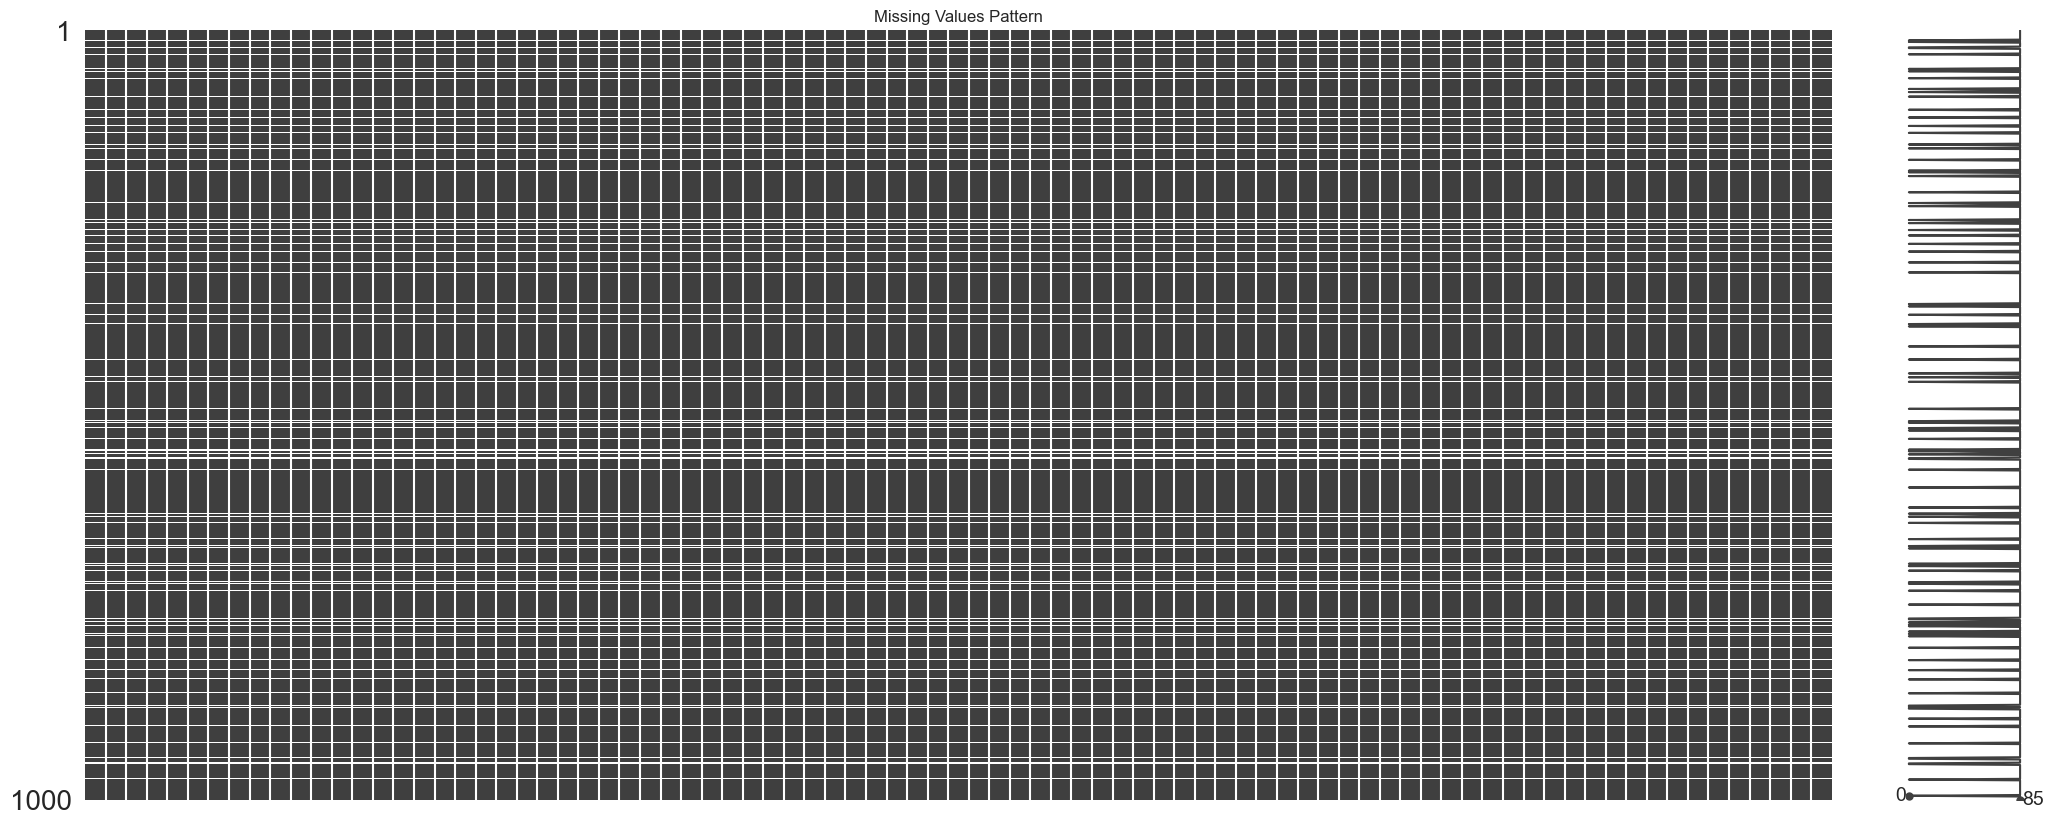

In [71]:
# Visualize missing values if any
if data.isnull().sum().sum() > 0:
    plt.figure(figsize=(12, 8))
    msno.matrix(data.sample(1000))  # Sample for performance
    plt.title('Missing Values Pattern')
    plt.show()
else:
    print("No missing values to visualize!")


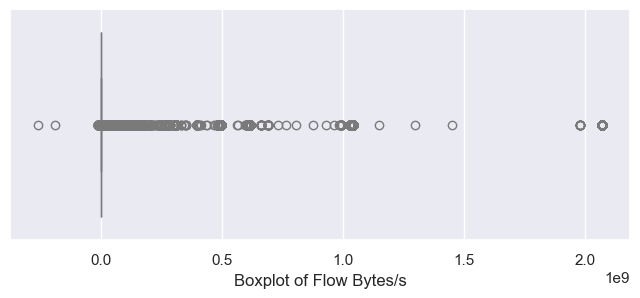

In [72]:
plt.figure(figsize = (8, 3))
sns.boxplot(x = data['Flow Bytes/s'])
plt.xlabel('Boxplot of Flow Bytes/s')
plt.show()

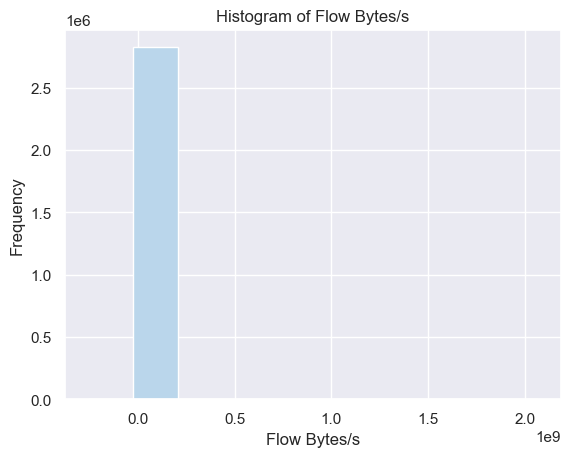

In [73]:

colors = sns.color_palette('Blues')
plt.hist(data['Flow Bytes/s'], color = colors[1])
plt.title('Histogram of Flow Bytes/s')
plt.xlabel('Flow Bytes/s')
plt.ylabel('Frequency')
plt.show()

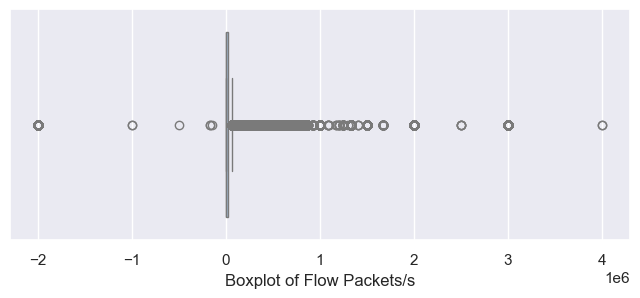

In [74]:
plt.figure(figsize = (8, 3))
sns.boxplot(x = data['Flow Packets/s'])
plt.xlabel('Boxplot of Flow Packets/s')
plt.show()

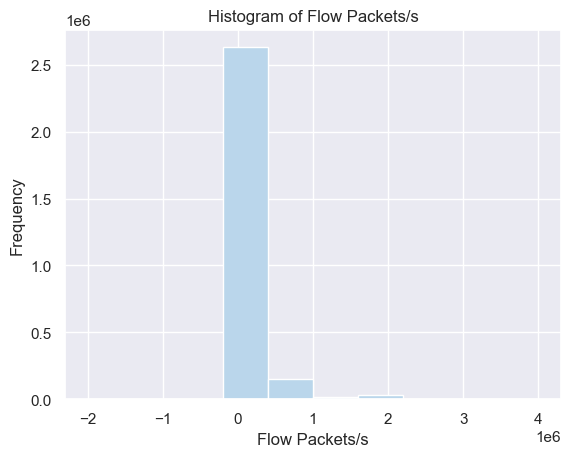

In [27]:
plt.hist(data['Flow Packets/s'], color = colors[1])
plt.title('Histogram of Flow Packets/s')
plt.xlabel('Flow Packets/s')
plt.ylabel('Frequency')
plt.show()

In [75]:

med_flow_bytes = data['Flow Bytes/s'].median()
med_flow_packets = data['Flow Packets/s'].median()

print('Median of Flow Bytes/s: ', med_flow_bytes)
print('Median of Flow Packets/s: ', med_flow_packets)
     

Median of Flow Bytes/s:  4586.600756
Median of Flow Packets/s:  109.47599922281486


In [76]:

# Filling missing values with median
data['Flow Bytes/s'].fillna(med_flow_bytes, inplace = True)
data['Flow Packets/s'].fillna(med_flow_packets, inplace = True)

In [77]:

print('Number of \'Flow Bytes/s\' missing values:', data['Flow Bytes/s'].isna().sum())
print('Number of \'Flow Packets/s\' missing values:', data['Flow Packets/s'].isna().sum())

Number of 'Flow Bytes/s' missing values: 0
Number of 'Flow Packets/s' missing values: 0


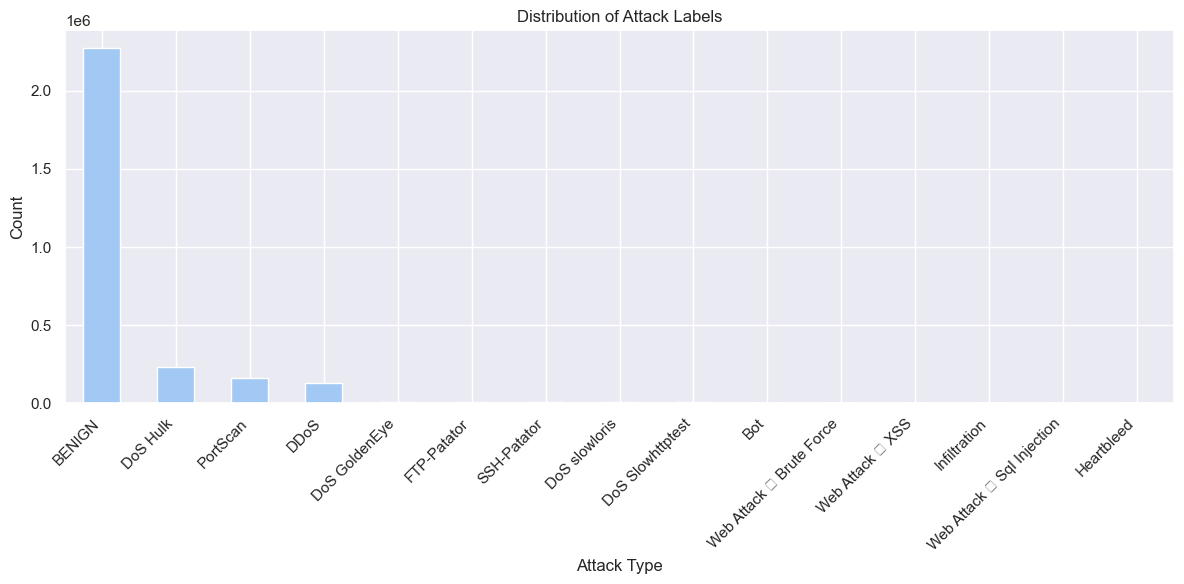

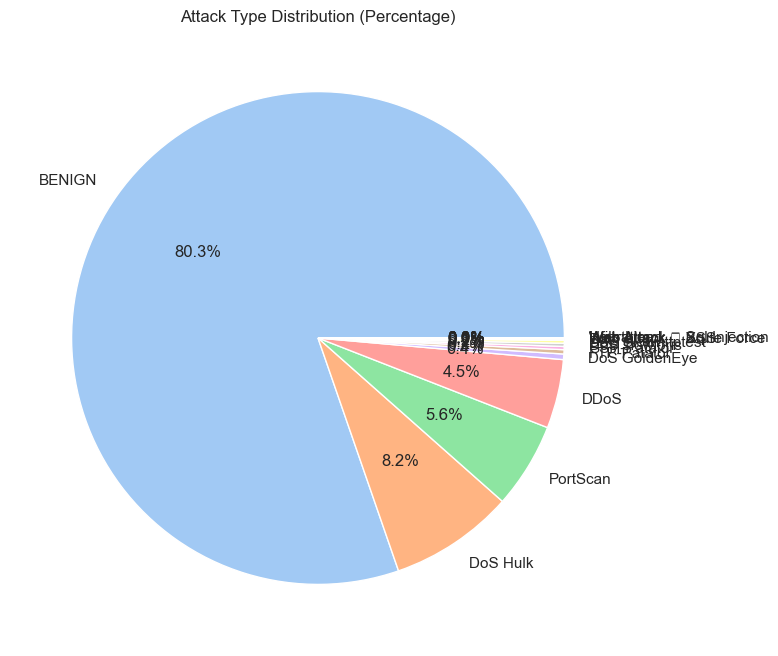

In [78]:
# Label distribution visualization
plt.figure(figsize=(12, 6))
label_counts.plot(kind='bar')
plt.title('Distribution of Attack Labels')
plt.xlabel('Attack Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Pie chart for label distribution
plt.figure(figsize=(10, 8))
label_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title('Attack Type Distribution (Percentage)')
plt.ylabel('')
plt.show()


## 8. Visual Pattern Anylasis


In [79]:

data['Label'].unique()

array(['BENIGN', 'FTP-Patator', 'SSH-Patator', 'DoS slowloris',
       'DoS Slowhttptest', 'DoS Hulk', 'DoS GoldenEye', 'Heartbleed',
       'Web Attack \x96 Brute Force', 'Web Attack \x96 XSS',
       'Web Attack \x96 Sql Injection', nan, 'Infiltration', 'Bot',
       'PortScan', 'DDoS'], dtype=object)

In [80]:

# Types of attacks & normal instances (BENIGN)
data['Label'].value_counts()

Label
BENIGN                        2273097
DoS Hulk                       231073
PortScan                       158930
DDoS                           128027
DoS GoldenEye                   10293
FTP-Patator                      7938
SSH-Patator                      5897
DoS slowloris                    5796
DoS Slowhttptest                 5499
Bot                              1966
Web Attack  Brute Force         1507
Web Attack  XSS                  652
Infiltration                       36
Web Attack  Sql Injection         21
Heartbleed                         11
Name: count, dtype: int64

In [81]:

# Creating a dictionary that maps each label to its attack type
attack_map = {
    'BENIGN': 'BENIGN',
    'DDoS': 'DDoS',
    'DoS Hulk': 'DoS',
    'DoS GoldenEye': 'DoS',
    'DoS slowloris': 'DoS',
    'DoS Slowhttptest': 'DoS',
    'PortScan': 'Port Scan',
    'FTP-Patator': 'Brute Force',
    'SSH-Patator': 'Brute Force',
    'Bot': 'Bot',
    'Web Attack � Brute Force': 'Web Attack',
    'Web Attack � XSS': 'Web Attack',
    'Web Attack � Sql Injection': 'Web Attack',
    'Infiltration': 'Infiltration',
    'Heartbleed': 'Heartbleed'
}

# Creating a new column 'Attack Type' in the DataFrame based on the attack_map dictionary
data['Attack Type'] = data['Label'].map(attack_map)

In [82]:

data['Attack Type'].value_counts()

Attack Type
BENIGN          2273097
DoS              252661
Port Scan        158930
DDoS             128027
Brute Force       13835
Bot                1966
Infiltration         36
Heartbleed           11
Name: count, dtype: int64

In [83]:
data.drop('Label', axis = 1, inplace = True)

In [84]:

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['Attack Number'] = le.fit_transform(data['Attack Type'])

print(data['Attack Number'].unique())
     

[0 2 4 5 8 6 1 7 3]


In [85]:

# Printing corresponding attack type for each encoded value
encoded_values = data['Attack Number'].unique()
for val in sorted(encoded_values):
    print(f"{val}: {le.inverse_transform([val])[0]}")

0: BENIGN
1: Bot
2: Brute Force
3: DDoS
4: DoS
5: Heartbleed
6: Infiltration
7: Port Scan
8: nan


In [86]:
corr = data.corr(numeric_only = True).round(2)
corr.style.background_gradient(cmap = 'coolwarm', axis = None).format(precision = 2)

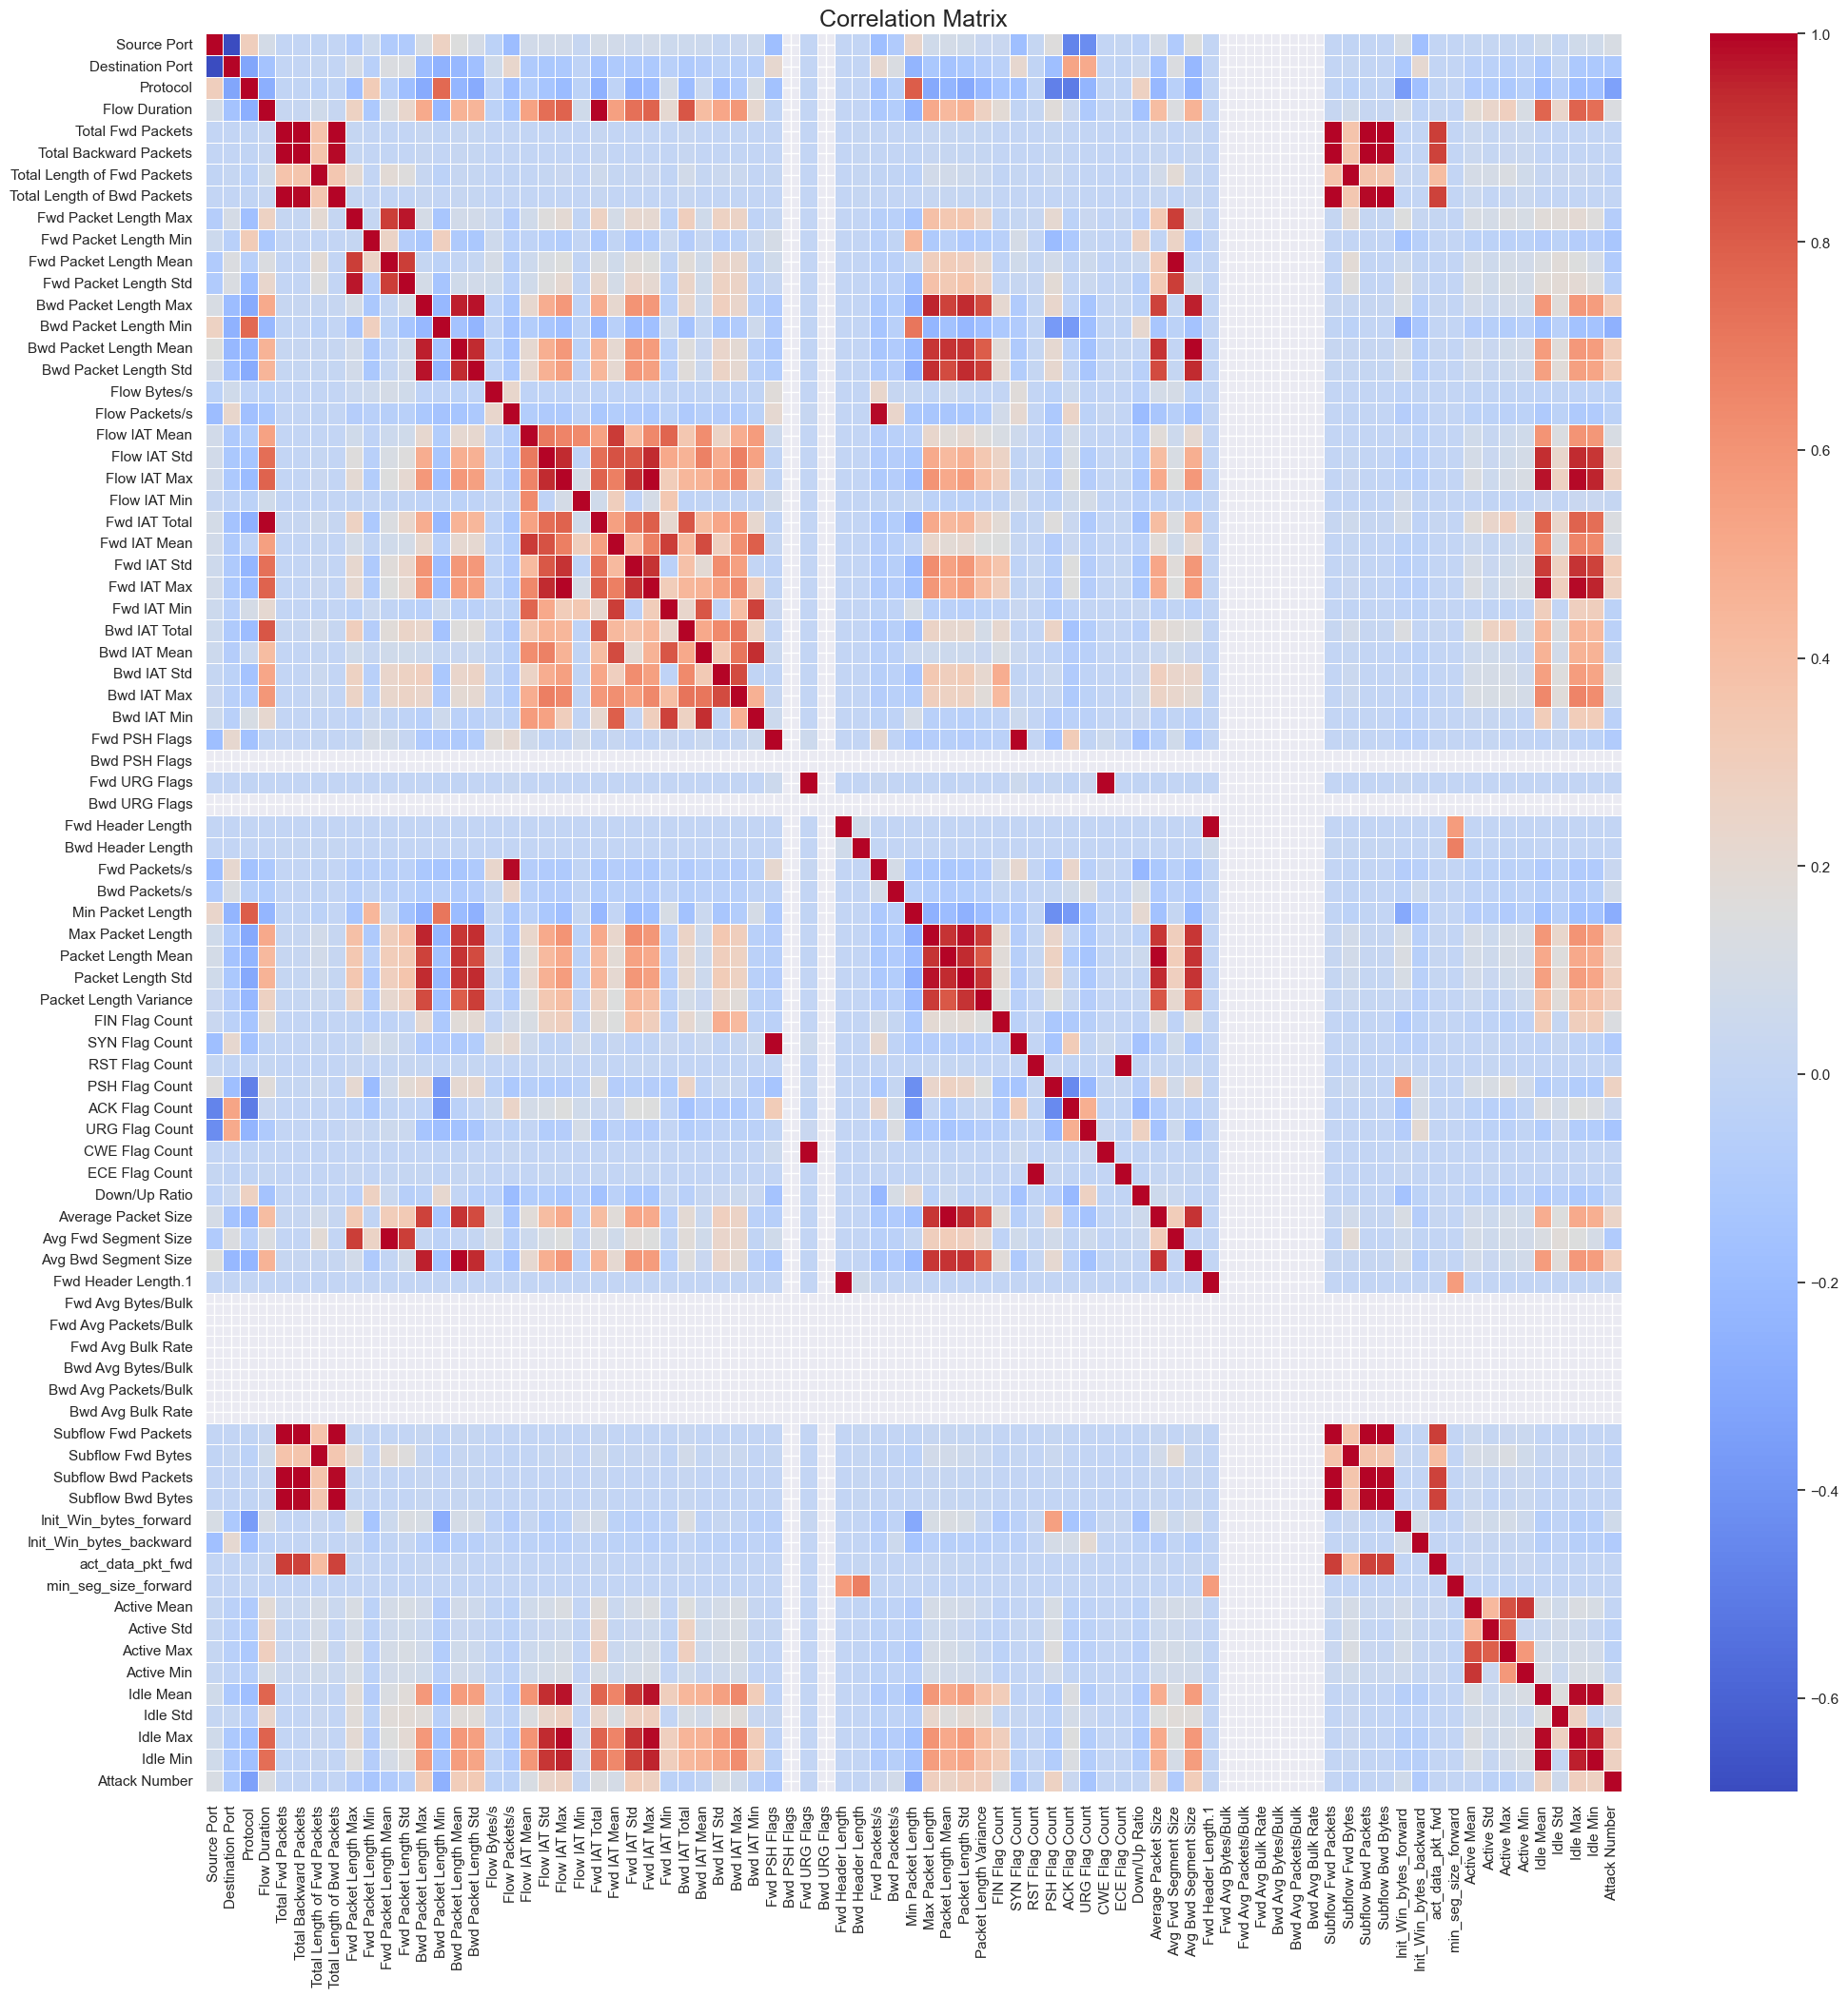

In [87]:

fig, ax = plt.subplots(figsize = (24, 24))
sns.heatmap(corr, cmap = 'coolwarm', annot = False, linewidth = 0.5)
plt.title('Correlation Matrix', fontsize = 18)
plt.show()
     

In [90]:

# Positive correlation features for 'Attack Number'
pos_corr_features = corr['Attack Number'][(corr['Attack Number'] > 0) & (corr['Attack Number'] < 1)].index.tolist()

print("Features with positive correlation with 'Attack Number':\n")
for i, feature in enumerate(pos_corr_features, start = 1):
    corr_value = corr.loc[feature, 'Attack Number']
    print('{:<3} {:<24} :{}'.format(f'{i}.', feature, corr_value))

Features with positive correlation with 'Attack Number':

1.  Source Port              :0.12
2.  Flow Duration            :0.14
3.  Bwd Packet Length Max    :0.32
4.  Bwd Packet Length Mean   :0.31
5.  Bwd Packet Length Std    :0.33
6.  Flow IAT Mean            :0.12
7.  Flow IAT Std             :0.24
8.  Flow IAT Max             :0.28
9.  Flow IAT Min             :0.01
10. Fwd IAT Total            :0.14
11. Fwd IAT Mean             :0.1
12. Fwd IAT Std              :0.31
13. Fwd IAT Max              :0.28
14. Bwd IAT Std              :0.11
15. Bwd IAT Max              :0.07
16. Fwd Packets/s            :0.03
17. Bwd Packets/s            :0.08
18. Max Packet Length        :0.29
19. Packet Length Mean       :0.25
20. Packet Length Std        :0.3
21. Packet Length Variance   :0.29
22. FIN Flag Count           :0.14
23. PSH Flag Count           :0.27
24. ACK Flag Count           :0.03
25. Average Packet Size      :0.25
26. Avg Bwd Segment Size     :0.31
27. Init_Win_bytes_forward   :0.07

In [91]:

print(f'Number of considerable important features: {len(pos_corr_features)}')

Number of considerable important features: 32


In [92]:
# Checking for columns with zero standard deviation (the blank squares in the heatmap)
std = data.std(numeric_only = True)
zero_std_cols = std[std == 0].index.tolist()
zero_std_cols
     

['Bwd PSH Flags',
 'Bwd URG Flags',
 'Fwd Avg Bytes/Bulk',
 'Fwd Avg Packets/Bulk',
 'Fwd Avg Bulk Rate',
 'Bwd Avg Bytes/Bulk',
 'Bwd Avg Packets/Bulk',
 'Bwd Avg Bulk Rate']

In [93]:
# Data sampling for data analysis
sample_size = int(0.2 * len(data)) # 20% of the original size
sampled_data = data.sample(n = sample_size, replace = False, random_state = 0)
sampled_data.shape

(623869, 86)

In [94]:

# To assess if a sample is representative of the population and comparison of descriptive statistics (mean)
numeric_cols = data.select_dtypes(include = [np.number]).columns.tolist()
print('Descriptive Statistics Comparison (mean):\n')
print('{:<32s}{:<22s}{:<22s}{}'.format('Feature', 'Original Dataset', 'Sampled Dataset', 'Variation Percentage'))
print('-' * 96)

high_variations = []
for col in numeric_cols:
    old = data[col].describe()[1]
    new = sampled_data[col].describe()[1]
    if old == 0:
        pct = 0
    else:
        pct = abs((new - old) / old)
    if pct * 100 > 5:
        high_variations.append((col, pct * 100))
    print('{:<32s}{:<22.6f}{:<22.6f}{:<2.2%}'.format(col, old, new, pct))

Descriptive Statistics Comparison (mean):

Feature                         Original Dataset      Sampled Dataset       Variation Percentage
------------------------------------------------------------------------------------------------
Source Port                     41128.855873          41131.936001          0.01%
Destination Port                8071.482501           8091.562414           0.25%
Protocol                        9.880341              9.879815              0.01%
Flow Duration                   14785663.929522       14798812.822618       0.09%
Total Fwd Packets               9.361160              9.508300              1.57%
Total Backward Packets          10.393770             10.522348             1.24%
Total Length of Fwd Packets     549.302415            539.144826            1.85%
Total Length of Bwd Packets     16162.642546          16872.765752          4.39%
Fwd Packet Length Max           207.599941            207.153638            0.21%
Fwd Packet Length Min    

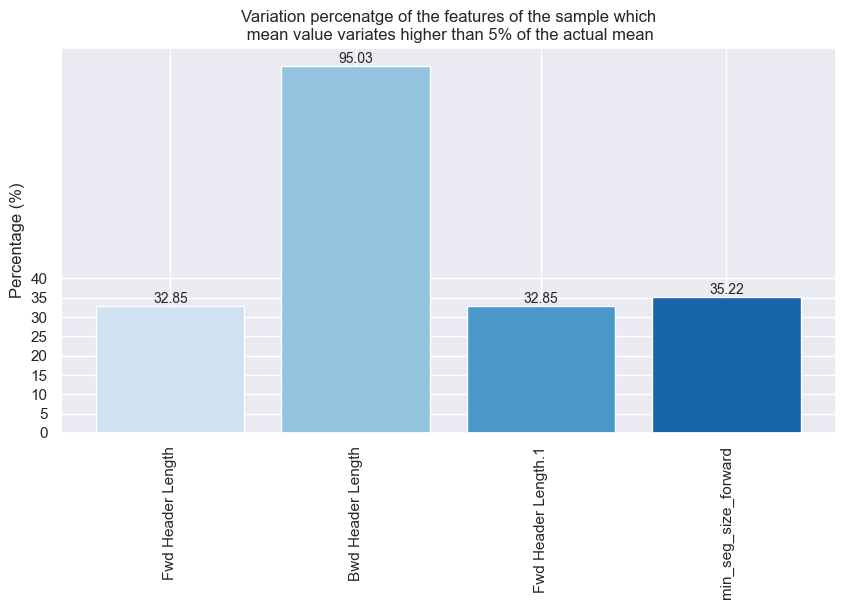

In [96]:

labels = [t[0] for t in high_variations]
values = [t[1] for t in high_variations]

colors = sns.color_palette('Blues', n_colors=len(labels))
fig, ax = plt.subplots(figsize = (10, 5))
ax.bar(labels, values, color = colors)

for i in range(len(labels)):
    ax.text(i, values[i], str(round(values[i], 2)), ha = 'center', va = 'bottom', fontsize = 10)

plt.xticks(rotation = 90)
ax.set_title('Variation percenatge of the features of the sample which\n mean value variates higher than 5% of the actual mean')
ax.set_ylabel('Percentage (%)')
ax.set_yticks(np.arange(0, 41, 5))
plt.show()

In [97]:

# Printing the unique value count
indent = '{:<3} {:<30}: {}'
print('Unique value count for: ')
for i, feature in enumerate(list(sampled_data.columns)[:-1], start = 1):
    print(indent.format(f'{i}.', feature, sampled_data[feature].nunique()))

Unique value count for: 
1.  Flow ID                       : 385416
2.  Source IP                     : 10874
3.  Source Port                   : 56771
4.  Destination IP                : 14357
5.  Destination Port              : 33408
6.  Protocol                      : 3
7.  Timestamp                     : 21665
8.  Flow Duration                 : 257298
9.  Total Fwd Packets             : 676
10. Total Backward Packets        : 843
11. Total Length of Fwd Packets   : 9063
12. Total Length of Bwd Packets   : 24160
13. Fwd Packet Length Max         : 3673
14. Fwd Packet Length Min         : 244
15. Fwd Packet Length Mean        : 37304
16. Fwd Packet Length Std         : 66428
17. Bwd Packet Length Max         : 3920
18. Bwd Packet Length Min         : 450
19. Bwd Packet Length Mean        : 47134
20. Bwd Packet Length Std         : 63132
21. Flow Bytes/s                  : 348613
22. Flow Packets/s                : 289460
23. Flow IAT Mean                 : 275778
24. Flow IAT Std   

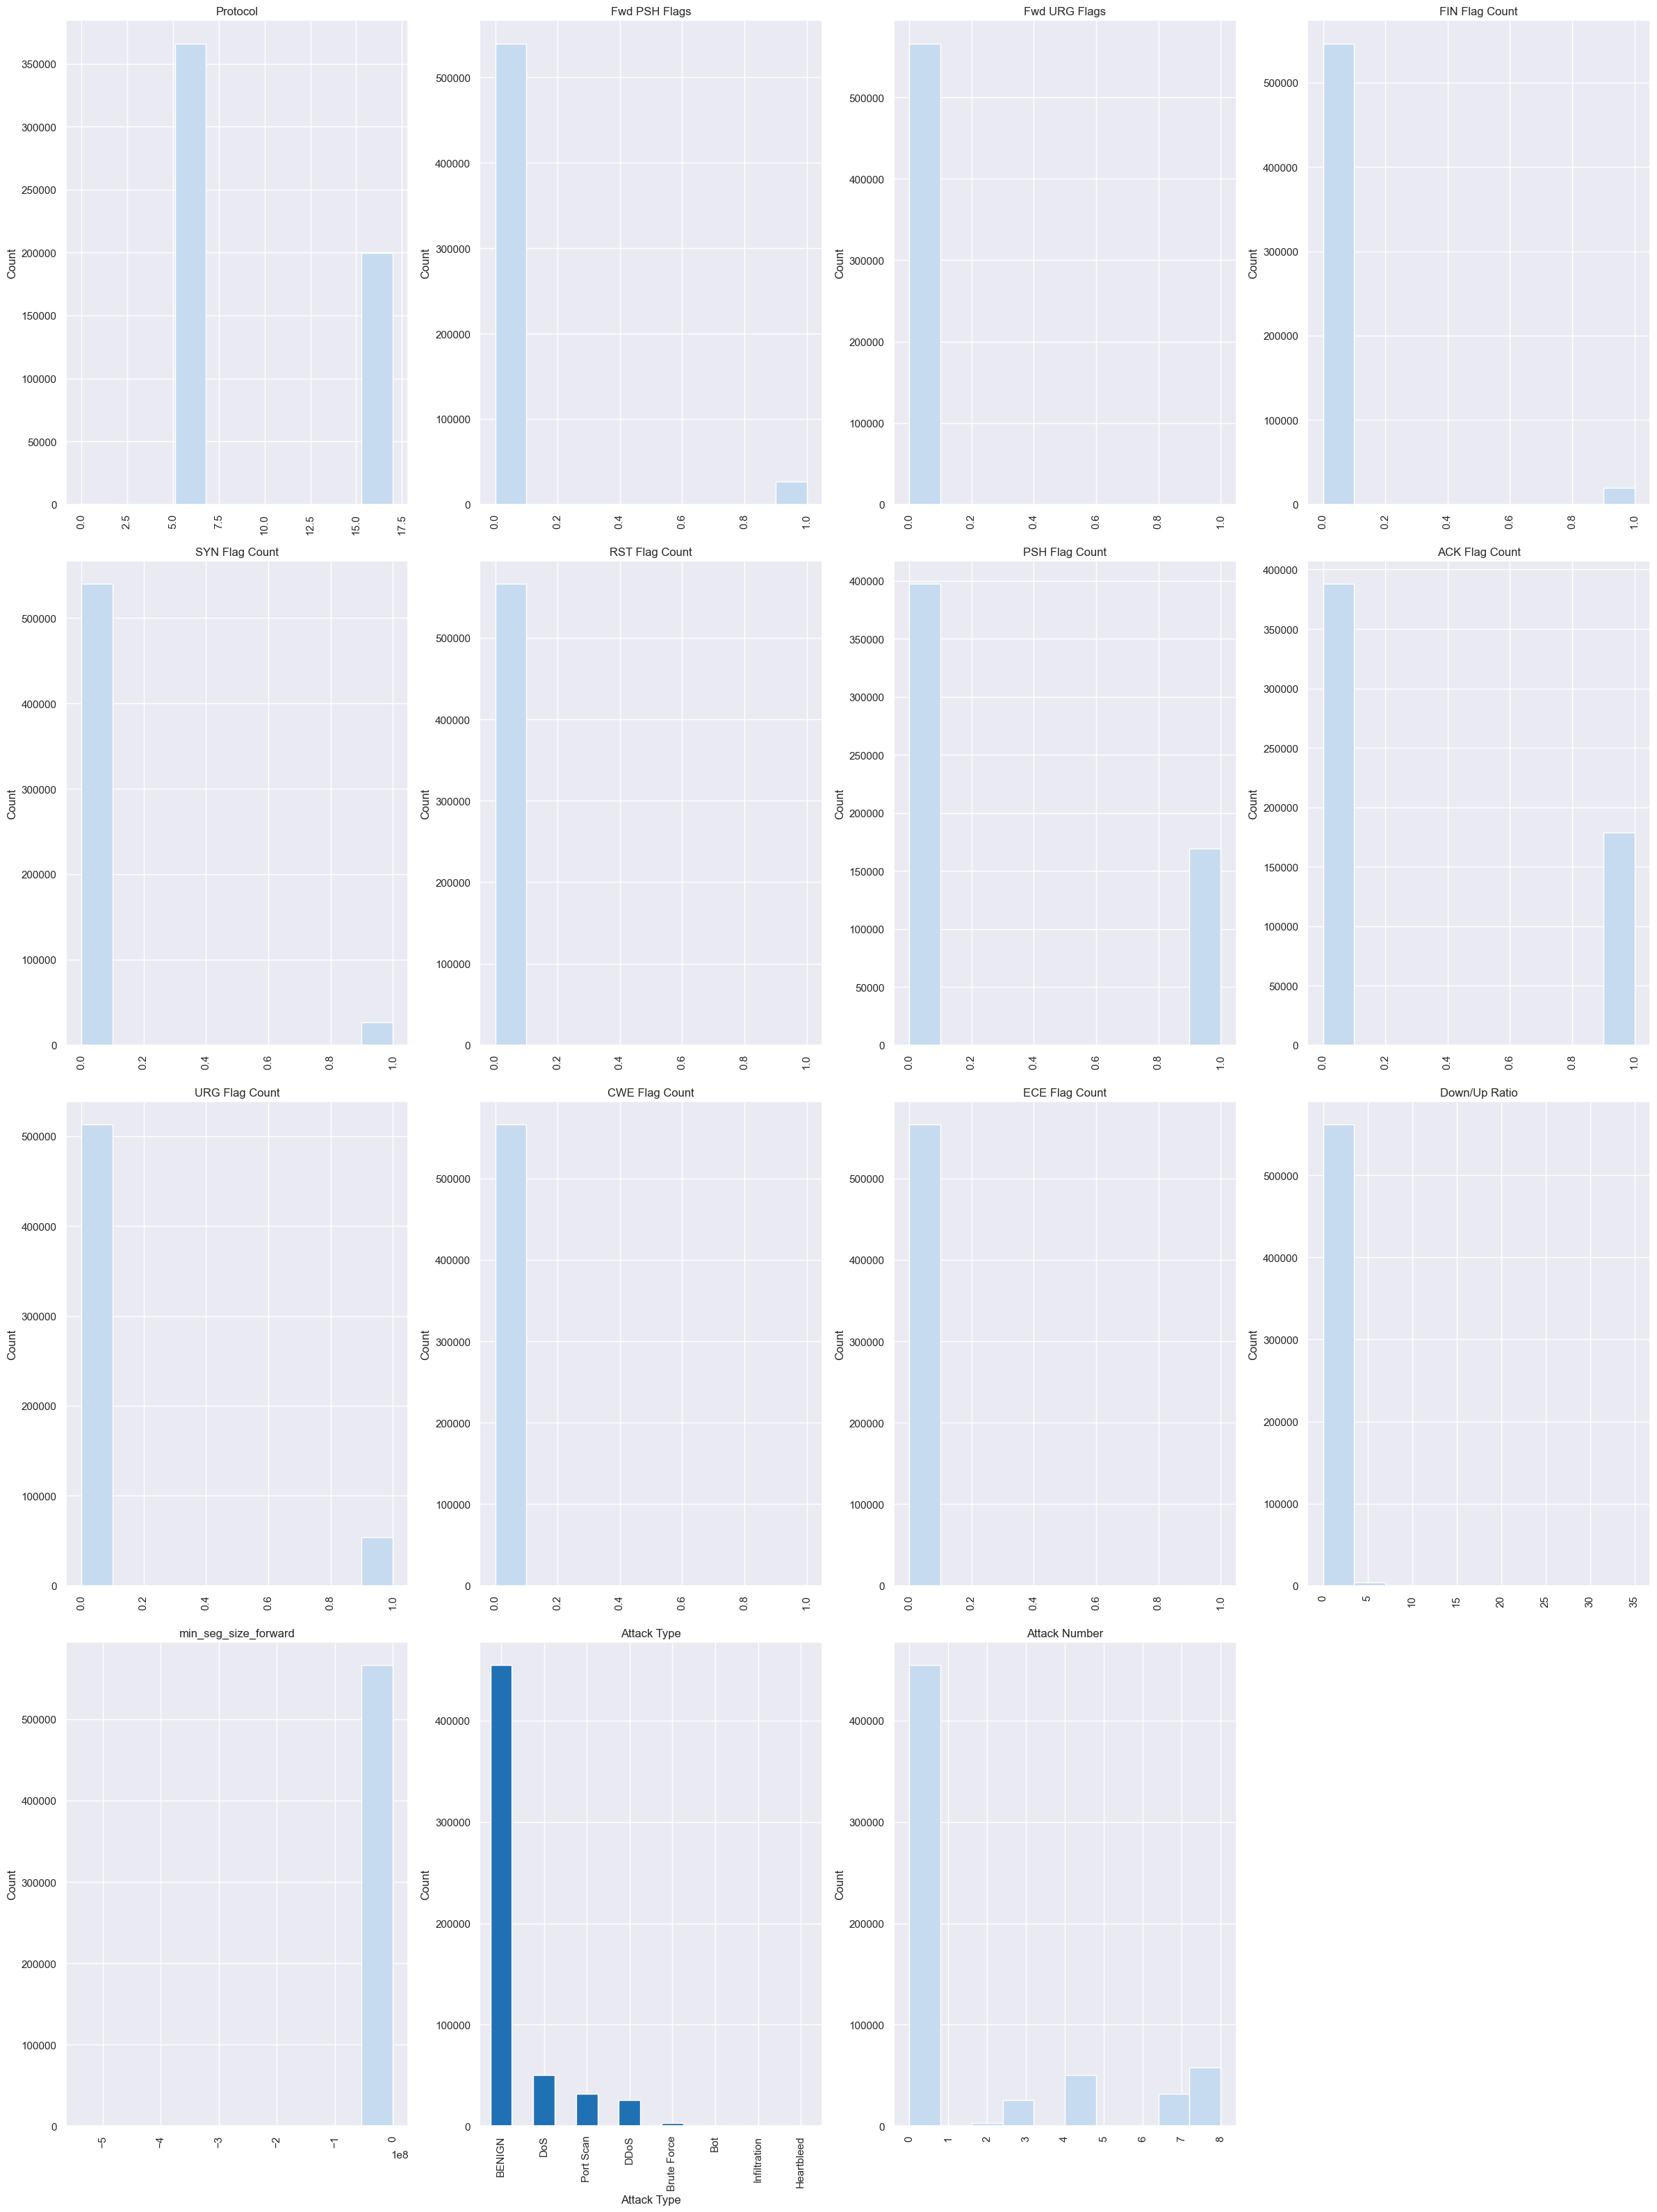

In [98]:

'''Generating a set of visualizations for columns that have more than one unique value but less than 50 unique values.
For categorical columns, a bar plot is generated showing the count of each unique value.
For numerical columns, a histogram is generated.'''
unique_values = sampled_data.nunique()
selected_cols = sampled_data[[col for col in sampled_data if 1 < unique_values[col] < 50]]
rows, cols = selected_cols.shape
col_names = list(selected_cols)
num_of_rows = (cols + 3) // 4

color_palette = sns.color_palette('Blues', n_colors = 3)
plt.figure(figsize = (6 * 4, 8 * num_of_rows))

for i in range(cols):
    plt.subplot(num_of_rows, 4, i + 1)
    col_data = selected_cols.iloc[:, i]
    if col_data.dtype.name == 'object':
        col_data.value_counts().plot(kind = 'bar', color = color_palette[2])
    else:
        col_data.hist(color = color_palette[0])

    plt.ylabel('Count')
    plt.xticks(rotation = 90)
    plt.title(col_names[i])

plt.tight_layout()
plt.show()

In [99]:
# Correlation matrix for sampled data
corr_matrix = sampled_data.corr(numeric_only = True).round(2)
corr_matrix.style.background_gradient(cmap = 'coolwarm', axis = None).format(precision = 2)

In [ ]:
# Create sampled data for analysis (to handle large dataset efficiently)
print("Creating sampled dataset for analysis...")
sample_size = int(0.2 * len(data))  # 20% of the original size
print(f"Original dataset size: {len(data):,} rows")
print(f"Sample size: {sample_size:,} rows")

sampled_data = data.sample(n=sample_size, replace=False, random_state=0)
print(f"Sampled dataset shape: {sampled_data.shape}")
print("✅ Sampled data created successfully!")


Finding highly correlated feature pairs...
Analyzing 81 numeric columns for correlations...
Found 92 highly correlated pairs (correlation >= 0.85)


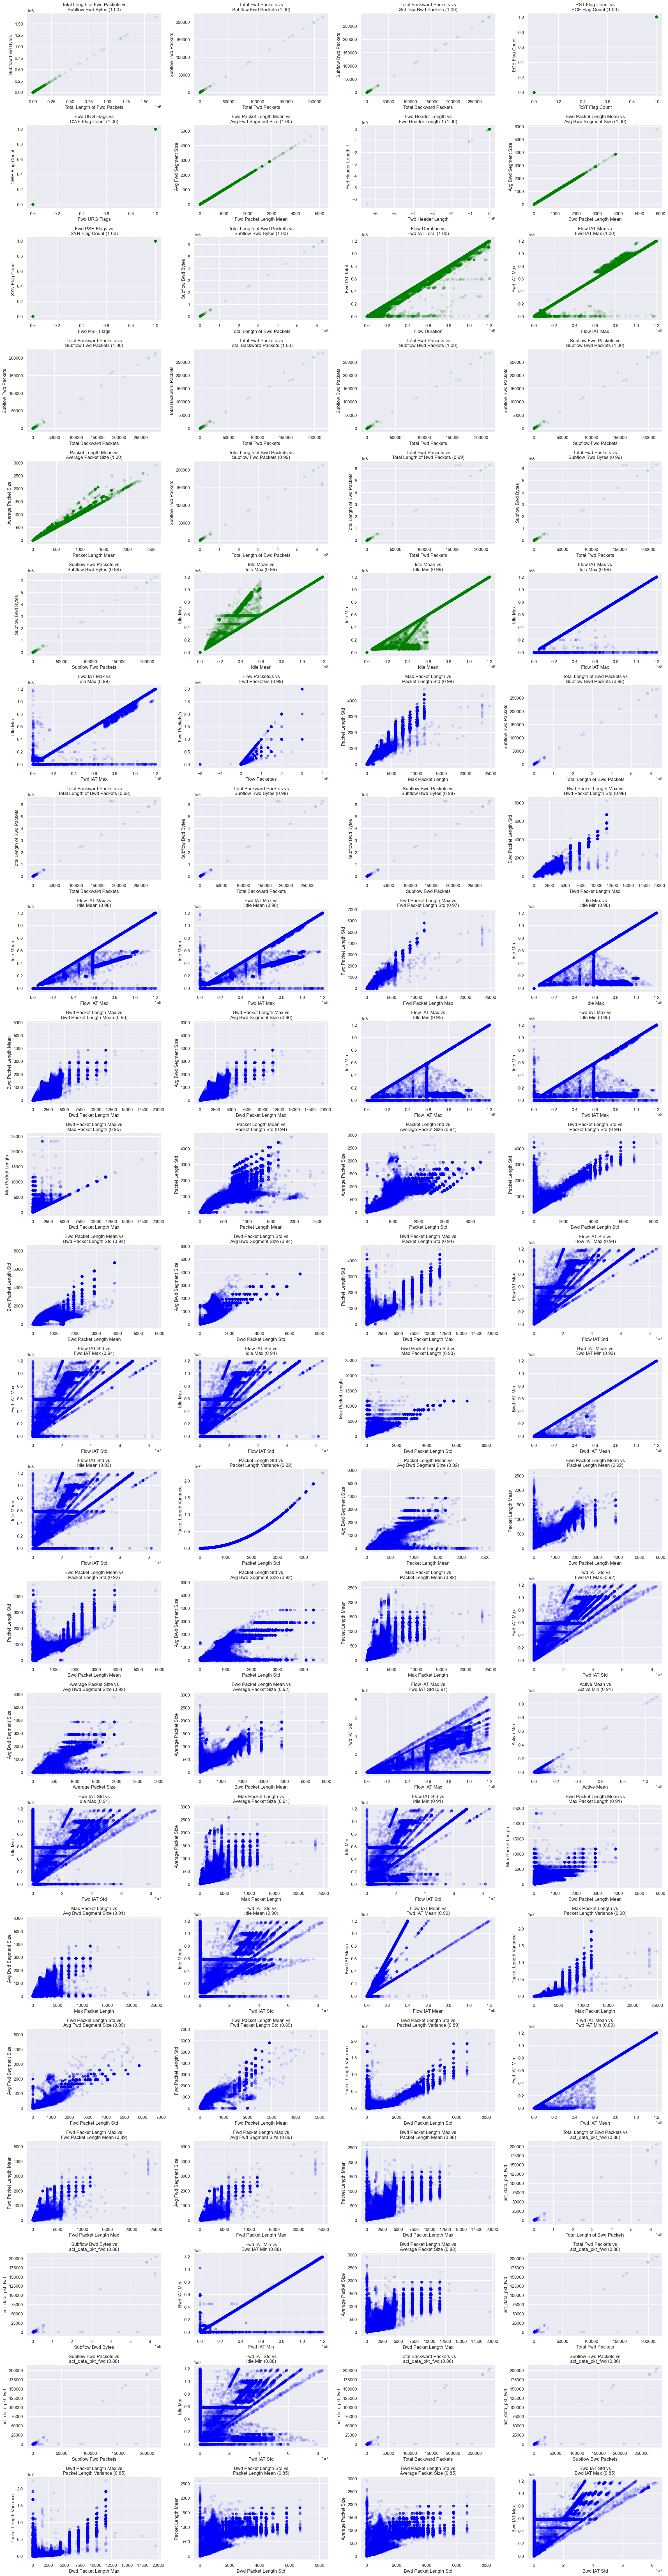


Top 10 highest correlations:
 1. Total Length of Fwd Packets <-> Subflow Fwd Bytes: 1.000
 2. Total Fwd Packets <-> Subflow Fwd Packets: 1.000
 3. Total Backward Packets <-> Subflow Bwd Packets: 1.000
 4. RST Flag Count <-> ECE Flag Count: 1.000
 5. Fwd URG Flags <-> CWE Flag Count: 1.000
 6. Fwd Packet Length Mean <-> Avg Fwd Segment Size: 1.000
 7. Fwd Header Length <-> Fwd Header Length.1: 1.000
 8. Bwd Packet Length Mean <-> Avg Bwd Segment Size: 1.000
 9. Fwd PSH Flags <-> SYN Flag Count: 1.000
10. Total Length of Bwd Packets <-> Subflow Bwd Bytes: 1.000


In [102]:
# Plotting the pairs of strongly positive correlated features in the sampled_data that have a correlation coefficient of 0.85 or higher
print("Finding highly correlated feature pairs...")

# Get numeric columns only (exclude non-numeric columns)
numeric_cols = sampled_data.select_dtypes(include=[np.number]).columns.tolist()
print(f"Analyzing {len(numeric_cols)} numeric columns for correlations...")

high_corr_pairs = []
corr_th = 0.85

for i in range(len(numeric_cols)):
    for j in range(i + 1, len(numeric_cols)):
        try:
            val = sampled_data[numeric_cols[i]].corr(sampled_data[numeric_cols[j]])
            # If the correlation coefficient is NaN or below the threshold, skip to the next pair
            if np.isnan(val) or val < corr_th:
                continue
            high_corr_pairs.append((val, numeric_cols[i], numeric_cols[j]))
        except Exception as e:
            print(f"Error calculating correlation between {numeric_cols[i]} and {numeric_cols[j]}: {e}")
            continue

print(f"Found {len(high_corr_pairs)} highly correlated pairs (correlation >= {corr_th})")

if len(high_corr_pairs) == 0:
    print("No highly correlated pairs found. Try lowering the correlation threshold.")
else:
    # Sort by correlation value (highest first)
    high_corr_pairs.sort(reverse=True)
    
    # Create subplots
    cols = 4
    size = len(high_corr_pairs)
    rows = (size + cols - 1) // cols  # Ceiling division
    
    fig, axs = plt.subplots(rows, cols, figsize=(24, int(rows * 4)))
    if rows == 1:
        axs = axs.reshape(1, -1)
    
    for i in range(rows):
        for j in range(cols):
            idx = i * cols + j
            if idx < size:
                val, x, y = high_corr_pairs[idx]
                if val > 0.99:
                    axs[i, j].scatter(sampled_data[x], sampled_data[y], color='green', alpha=0.1)
                else:
                    axs[i, j].scatter(sampled_data[x], sampled_data[y], color='blue', alpha=0.1)
                axs[i, j].set_xlabel(x)
                axs[i, j].set_ylabel(y)
                axs[i, j].set_title(f'{x} vs\n{y} ({val:.2f})')
            else:
                fig.delaxes(axs[i, j])
    
    fig.tight_layout()
    plt.show()
    
    # Print summary of top correlations
    print("\nTop 10 highest correlations:")
    for i, (val, x, y) in enumerate(high_corr_pairs[:10]):
        print(f"{i+1:2d}. {x} <-> {y}: {val:.3f}")

In [103]:
sampled_data.drop('Attack Number', axis = 1, inplace = True)
data.drop('Attack Number', axis = 1, inplace = True)

In [104]:

# Identifying outliers
numeric_data = sampled_data.select_dtypes(include = ['float', 'int'])
q1 = numeric_data.quantile(0.25)
q3 = numeric_data.quantile(0.75)
iqr = q3 - q1
outlier = (numeric_data < (q1 - 1.5 * iqr)) | (numeric_data > (q3 + 1.5 * iqr))
outlier_count = outlier.sum()
outlier_percentage = round(outlier.mean() * 100, 2)
outlier_stats = pd.concat([outlier_count, outlier_percentage], axis = 1)
outlier_stats.columns = ['Outlier Count', 'Outlier Percentage']

print(outlier_stats)

                             Outlier Count  Outlier Percentage
Source Port                              0                0.00
Destination Port                    125696               20.15
Protocol                                 0                0.00
Flow Duration                       106684               17.10
Total Fwd Packets                    66749               10.70
Total Backward Packets               61854                9.91
Total Length of Fwd Packets          89492               14.34
Total Length of Bwd Packets         124262               19.92
Fwd Packet Length Max               131133               21.02
Fwd Packet Length Min                 3019                0.48
Fwd Packet Length Mean               37521                6.01
Fwd Packet Length Std               133070               21.33
Bwd Packet Length Max               127858               20.49
Bwd Packet Length Min                17011                2.73
Bwd Packet Length Mean               94961             

In [106]:

# Identifying outliers based on attack type
print("Analyzing outliers by attack type...")

# Define numeric data (exclude non-numeric columns)
numeric_data = sampled_data.select_dtypes(include=['float', 'int'])
print(f"Analyzing {len(numeric_data.columns)} numeric features for outliers...")

# Check if Attack Type column exists
if 'Attack Type' not in sampled_data.columns:
    print("❌ 'Attack Type' column not found. Available columns:")
    print(sampled_data.columns.tolist())
    print("\nTrying alternative column names...")
    
    # Try to find label column
    label_cols = [col for col in sampled_data.columns if 'label' in col.lower() or 'attack' in col.lower() or 'class' in col.lower()]
    if label_cols:
        label_col = label_cols[0]
        print(f"Using '{label_col}' as the attack type column")
        sampled_data['Attack Type'] = sampled_data[label_col]
    else:
        print("No suitable label column found. Creating dummy attack types for demonstration...")
        sampled_data['Attack Type'] = 'Unknown'

outlier_counts = {}
attack_types = sampled_data['Attack Type'].unique()
print(f"Found {len(attack_types)} attack types: {list(attack_types)}")

# Calculate outliers for each feature and attack type
for feature in numeric_data.columns:
    for attack_type in attack_types:
        try:
            attack_data = sampled_data[feature][sampled_data['Attack Type'] == attack_type]
            
            # Skip if no data for this attack type
            if len(attack_data) == 0:
                continue
                
            # Calculate IQR and bounds
            q1, q3 = np.percentile(attack_data, [25, 75])
            iqr = q3 - q1
            
            # Skip if IQR is 0 (no variation)
            if iqr == 0:
                continue
                
            lower_bound = q1 - 1.5 * iqr
            upper_bound = q3 + 1.5 * iqr
            
            # Count outliers
            num_outliers = ((attack_data < lower_bound) | (attack_data > upper_bound)).sum()
            outlier_percent = num_outliers / len(attack_data) * 100
            
            outlier_counts[(feature, attack_type)] = (num_outliers, outlier_percent)
            
        except Exception as e:
            print(f"Error processing {feature} for {attack_type}: {e}")
            continue

# Display results
print(f"\n{'='*80}")
print("OUTLIER ANALYSIS BY ATTACK TYPE")
print(f"{'='*80}")

for feature in numeric_data.columns:
    print(f'\nFeature: {feature}')
    print('-' * 50)
    
    feature_outliers = [(attack_type, counts) for (f, attack_type), counts in outlier_counts.items() if f == feature]
    
    if not feature_outliers:
        print("  No outlier data available")
        continue
        
    for attack_type, (num_outliers, outlier_percent) in feature_outliers:
        print(f'  {attack_type}: {num_outliers:,} outliers ({outlier_percent:.2f}%)')

print(f"\n{'='*80}")
print("SUMMARY: Top 5 features with most outliers")
print(f"{'='*80}")

# Calculate total outliers per feature
feature_totals = {}
for (feature, attack_type), (num_outliers, outlier_percent) in outlier_counts.items():
    if feature not in feature_totals:
        feature_totals[feature] = 0
    feature_totals[feature] += num_outliers

# Sort by total outliers
sorted_features = sorted(feature_totals.items(), key=lambda x: x[1], reverse=True)

for i, (feature, total_outliers) in enumerate(sorted_features[:5]):
    print(f"{i+1}. {feature}: {total_outliers:,} total outliers")

Analyzing outliers by attack type...
Analyzing 80 numeric features for outliers...
Found 9 attack types: ['BENIGN', 'DoS', nan, 'Port Scan', 'DDoS', 'Brute Force', 'Bot', 'Heartbleed', 'Infiltration']

OUTLIER ANALYSIS BY ATTACK TYPE

Feature: Source Port
--------------------------------------------------
  BENIGN: 0 outliers (0.00%)
  DoS: 0 outliers (0.00%)
  Port Scan: 2 outliers (0.01%)
  DDoS: 0 outliers (0.00%)
  Brute Force: 0 outliers (0.00%)
  Bot: 0 outliers (0.00%)
  Infiltration: 0 outliers (0.00%)

Feature: Destination Port
--------------------------------------------------
  BENIGN: 98,550 outliers (21.68%)
  Port Scan: 4,024 outliers (12.61%)
  Brute Force: 0 outliers (0.00%)

Feature: Protocol
--------------------------------------------------
  BENIGN: 0 outliers (0.00%)

Feature: Flow Duration
--------------------------------------------------
  BENIGN: 104,600 outliers (23.02%)
  DoS: 0 outliers (0.00%)
  Port Scan: 2,362 outliers (7.40%)
  DDoS: 4,393 outliers (17.0

Creating visualization for features with >20% outliers...
Found 54 feature-attack combinations with >20% outliers


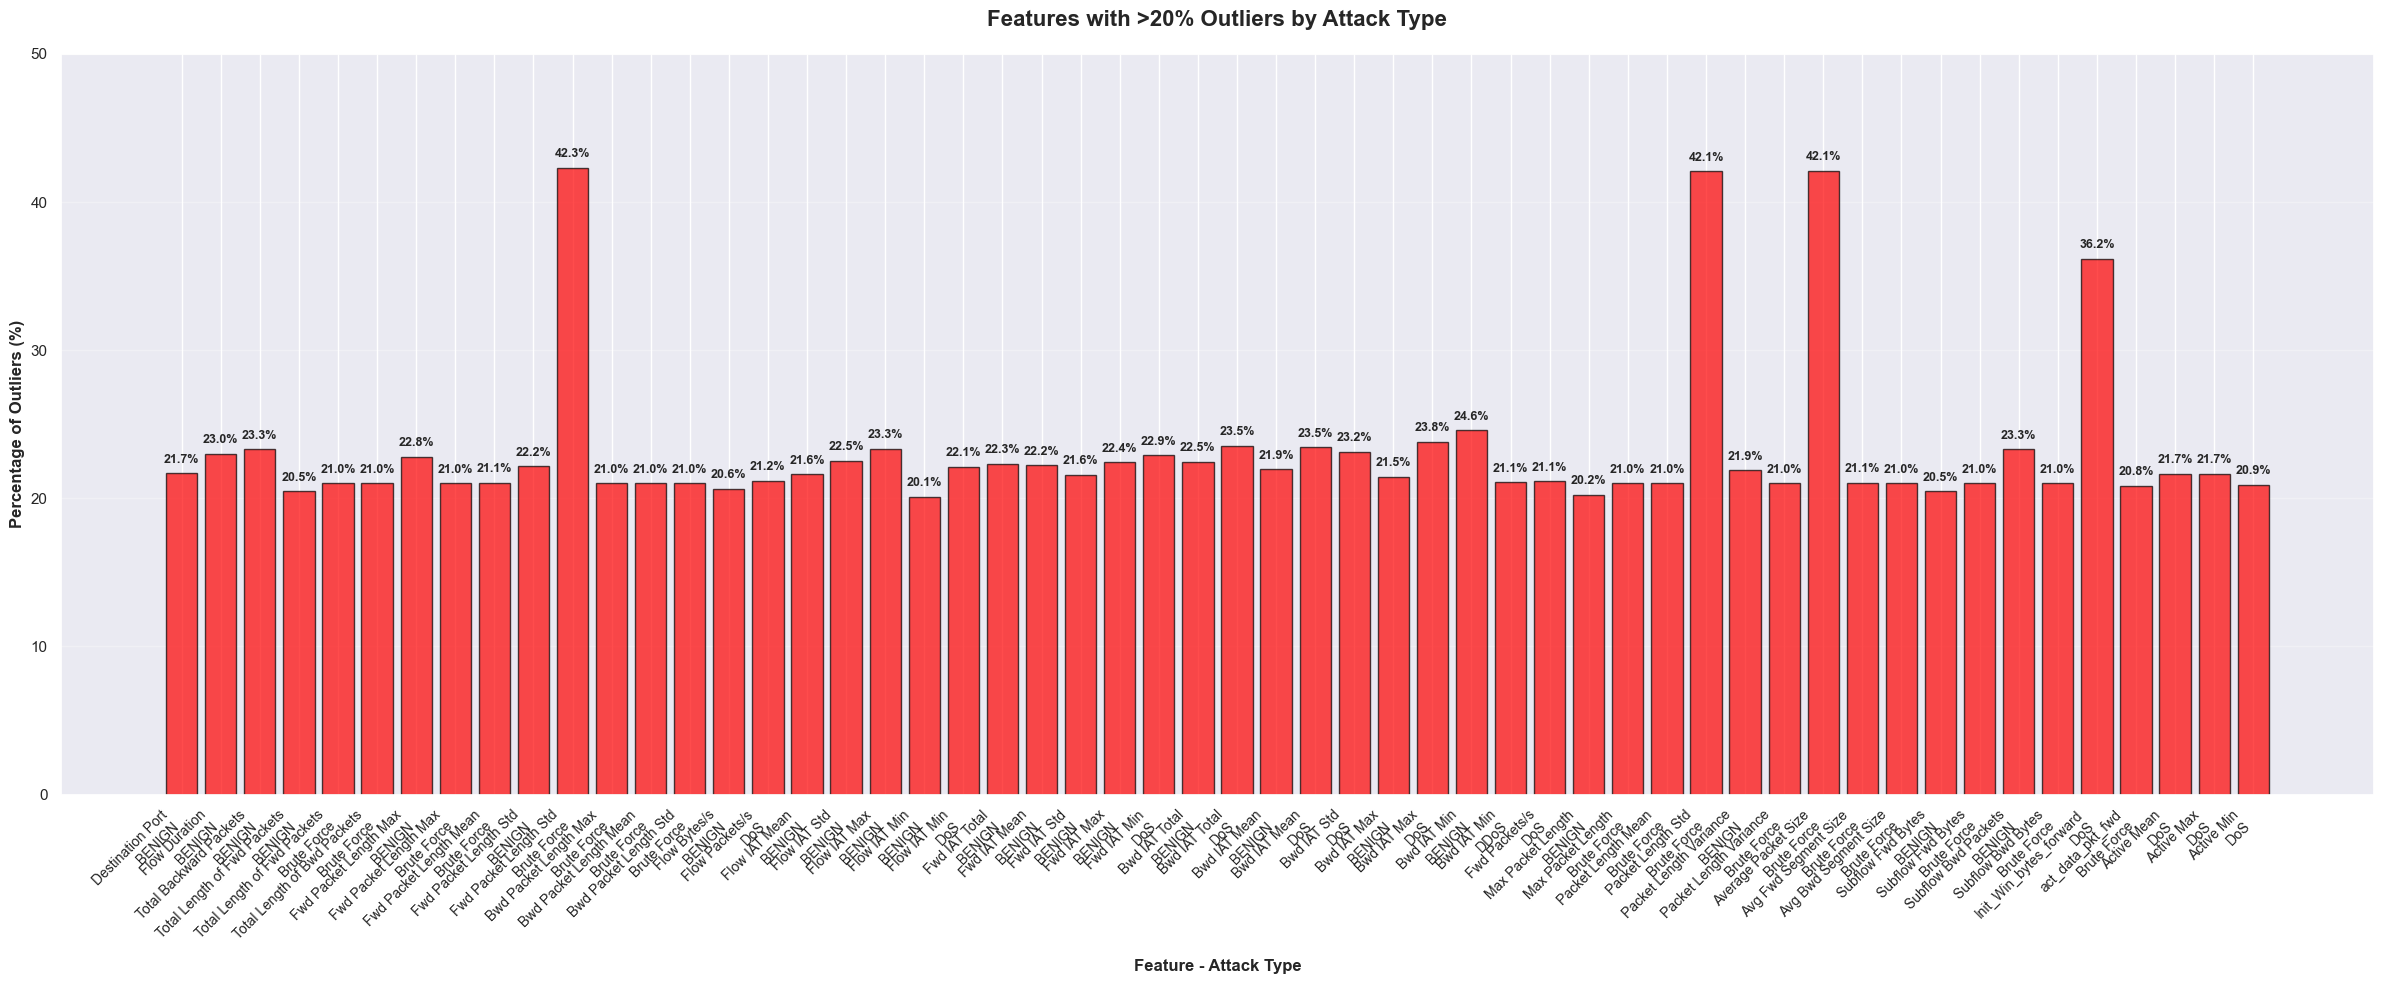


SUMMARY: Features with >20% outliers
 1. Fwd Packet Length Std
Brute Force: 42.3% outliers
 2. Average Packet Size
Brute Force: 42.1% outliers
 3. Packet Length Std
Brute Force: 42.1% outliers
 4. Init_Win_bytes_forward
DoS: 36.2% outliers
 5. Bwd IAT Min
BENIGN: 24.6% outliers
 6. Bwd IAT Max
DoS: 23.8% outliers
 7. Bwd IAT Total
DoS: 23.5% outliers
 8. Bwd IAT Mean
DoS: 23.5% outliers
 9. Flow IAT Max
BENIGN: 23.3% outliers
10. Total Backward Packets
BENIGN: 23.3% outliers
... and 44 more


In [108]:

# Plotting the percentage of outliers that are higher than 20%
print("Creating visualization for features with >20% outliers...")

# Check if outlier_counts exists from previous cell
if 'outlier_counts' not in locals():
    print("❌ outlier_counts not found. Please run the previous cell first.")
else:
    # Collect data for plotting
    plot_data = []
    plot_labels = []
    
    threshold = 20  # 20% threshold
    
    for feature in numeric_data.columns:
        for attack_type in sampled_data['Attack Type'].unique():
            # Check if this combination exists in outlier_counts
            key = (feature, attack_type)
            if key in outlier_counts:
                num_outliers, outlier_percent = outlier_counts[key]
                if outlier_percent > threshold:
                    plot_data.append(outlier_percent)
                    plot_labels.append(f'{feature}\n{attack_type}')
    
    if not plot_data:
        print(f"No features found with >{threshold}% outliers.")
        print("Try lowering the threshold or check the data.")
    else:
        print(f"Found {len(plot_data)} feature-attack combinations with >{threshold}% outliers")
        
        # Create the plot
        fig, ax = plt.subplots(figsize=(24, 10))
        
        # Create bars
        bars = ax.bar(range(len(plot_data)), plot_data, 
                     color='red', alpha=0.7, edgecolor='black')
        
        # Customize the plot
        ax.set_xlabel('Feature - Attack Type', fontsize=12, fontweight='bold')
        ax.set_ylabel('Percentage of Outliers (%)', fontsize=12, fontweight='bold')
        ax.set_title(f'Features with >{threshold}% Outliers by Attack Type', 
                    fontsize=16, fontweight='bold', pad=20)
        
        # Set x-axis labels
        ax.set_xticks(range(len(plot_labels)))
        ax.set_xticklabels(plot_labels, rotation=45, ha='right', fontsize=10)
        
        # Set y-axis
        max_outlier = max(plot_data) if plot_data else 100
        ax.set_ylim(0, max_outlier * 1.1)
        ax.set_yticks(np.arange(0, max_outlier + 10, 10))
        
        # Add value labels on bars
        for i, (bar, value) in enumerate(zip(bars, plot_data)):
            ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
                   f'{value:.1f}%', ha='center', va='bottom', fontsize=9, fontweight='bold')
        
        # Add grid for better readability
        ax.grid(True, alpha=0.3, axis='y')
        
        # Adjust layout
        plt.tight_layout()
        plt.show()
        
        # Print summary
        print(f"\n{'='*60}")
        print(f"SUMMARY: Features with >{threshold}% outliers")
        print(f"{'='*60}")
        
        # Sort by outlier percentage
        sorted_data = sorted(zip(plot_labels, plot_data), key=lambda x: x[1], reverse=True)
        
        for i, (label, percent) in enumerate(sorted_data[:10]):  # Top 10
            print(f"{i+1:2d}. {label}: {percent:.1f}% outliers")
        
        if len(sorted_data) > 10:
            print(f"... and {len(sorted_data) - 10} more")

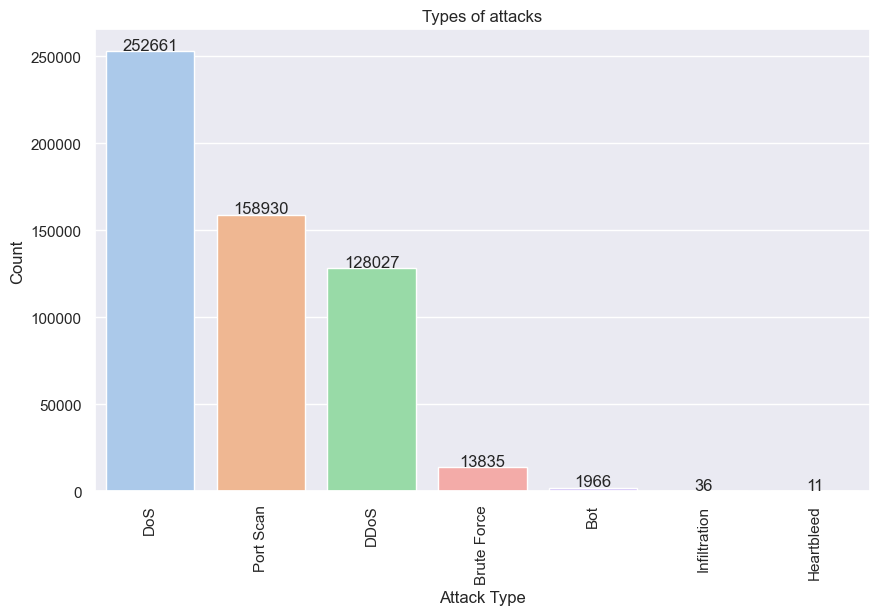

In [109]:

# Different 'Attack Type' in the main dataset excluding 'BENIGN'
attacks = data.loc[data['Attack Type'] != 'BENIGN']

plt.figure(figsize = (10, 6))
ax = sns.countplot(x = 'Attack Type', data = attacks, palette = 'pastel', order = attacks['Attack Type'].value_counts().index)
plt.title('Types of attacks')
plt.xlabel('Attack Type')
plt.ylabel('Count')
plt.xticks(rotation = 90)

for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2, p.get_height() + 1000), ha = 'center')

plt.show()

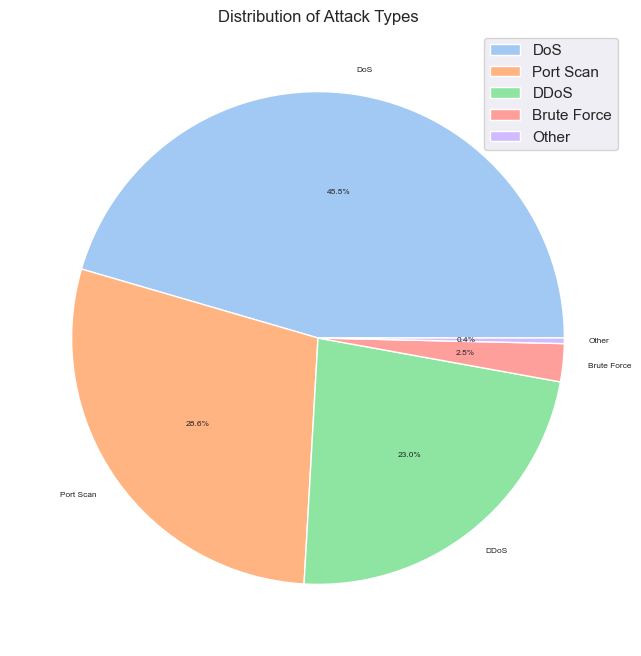

In [110]:
attack_counts = attacks['Attack Type'].value_counts()
threshold = 0.005
percentages = attack_counts / attack_counts.sum()
small_slices = percentages[percentages < threshold].index.tolist()
attack_counts['Other'] = attack_counts[small_slices].sum()
attack_counts.drop(small_slices, inplace = True)

sns.set_palette('pastel')
plt.figure(figsize = (8, 8))
plt.pie(attack_counts.values, labels = attack_counts.index, autopct = '%1.1f%%', textprops={'fontsize': 6})
plt.title('Distribution of Attack Types')
plt.legend(attack_counts.index, loc = 'best')
plt.show()

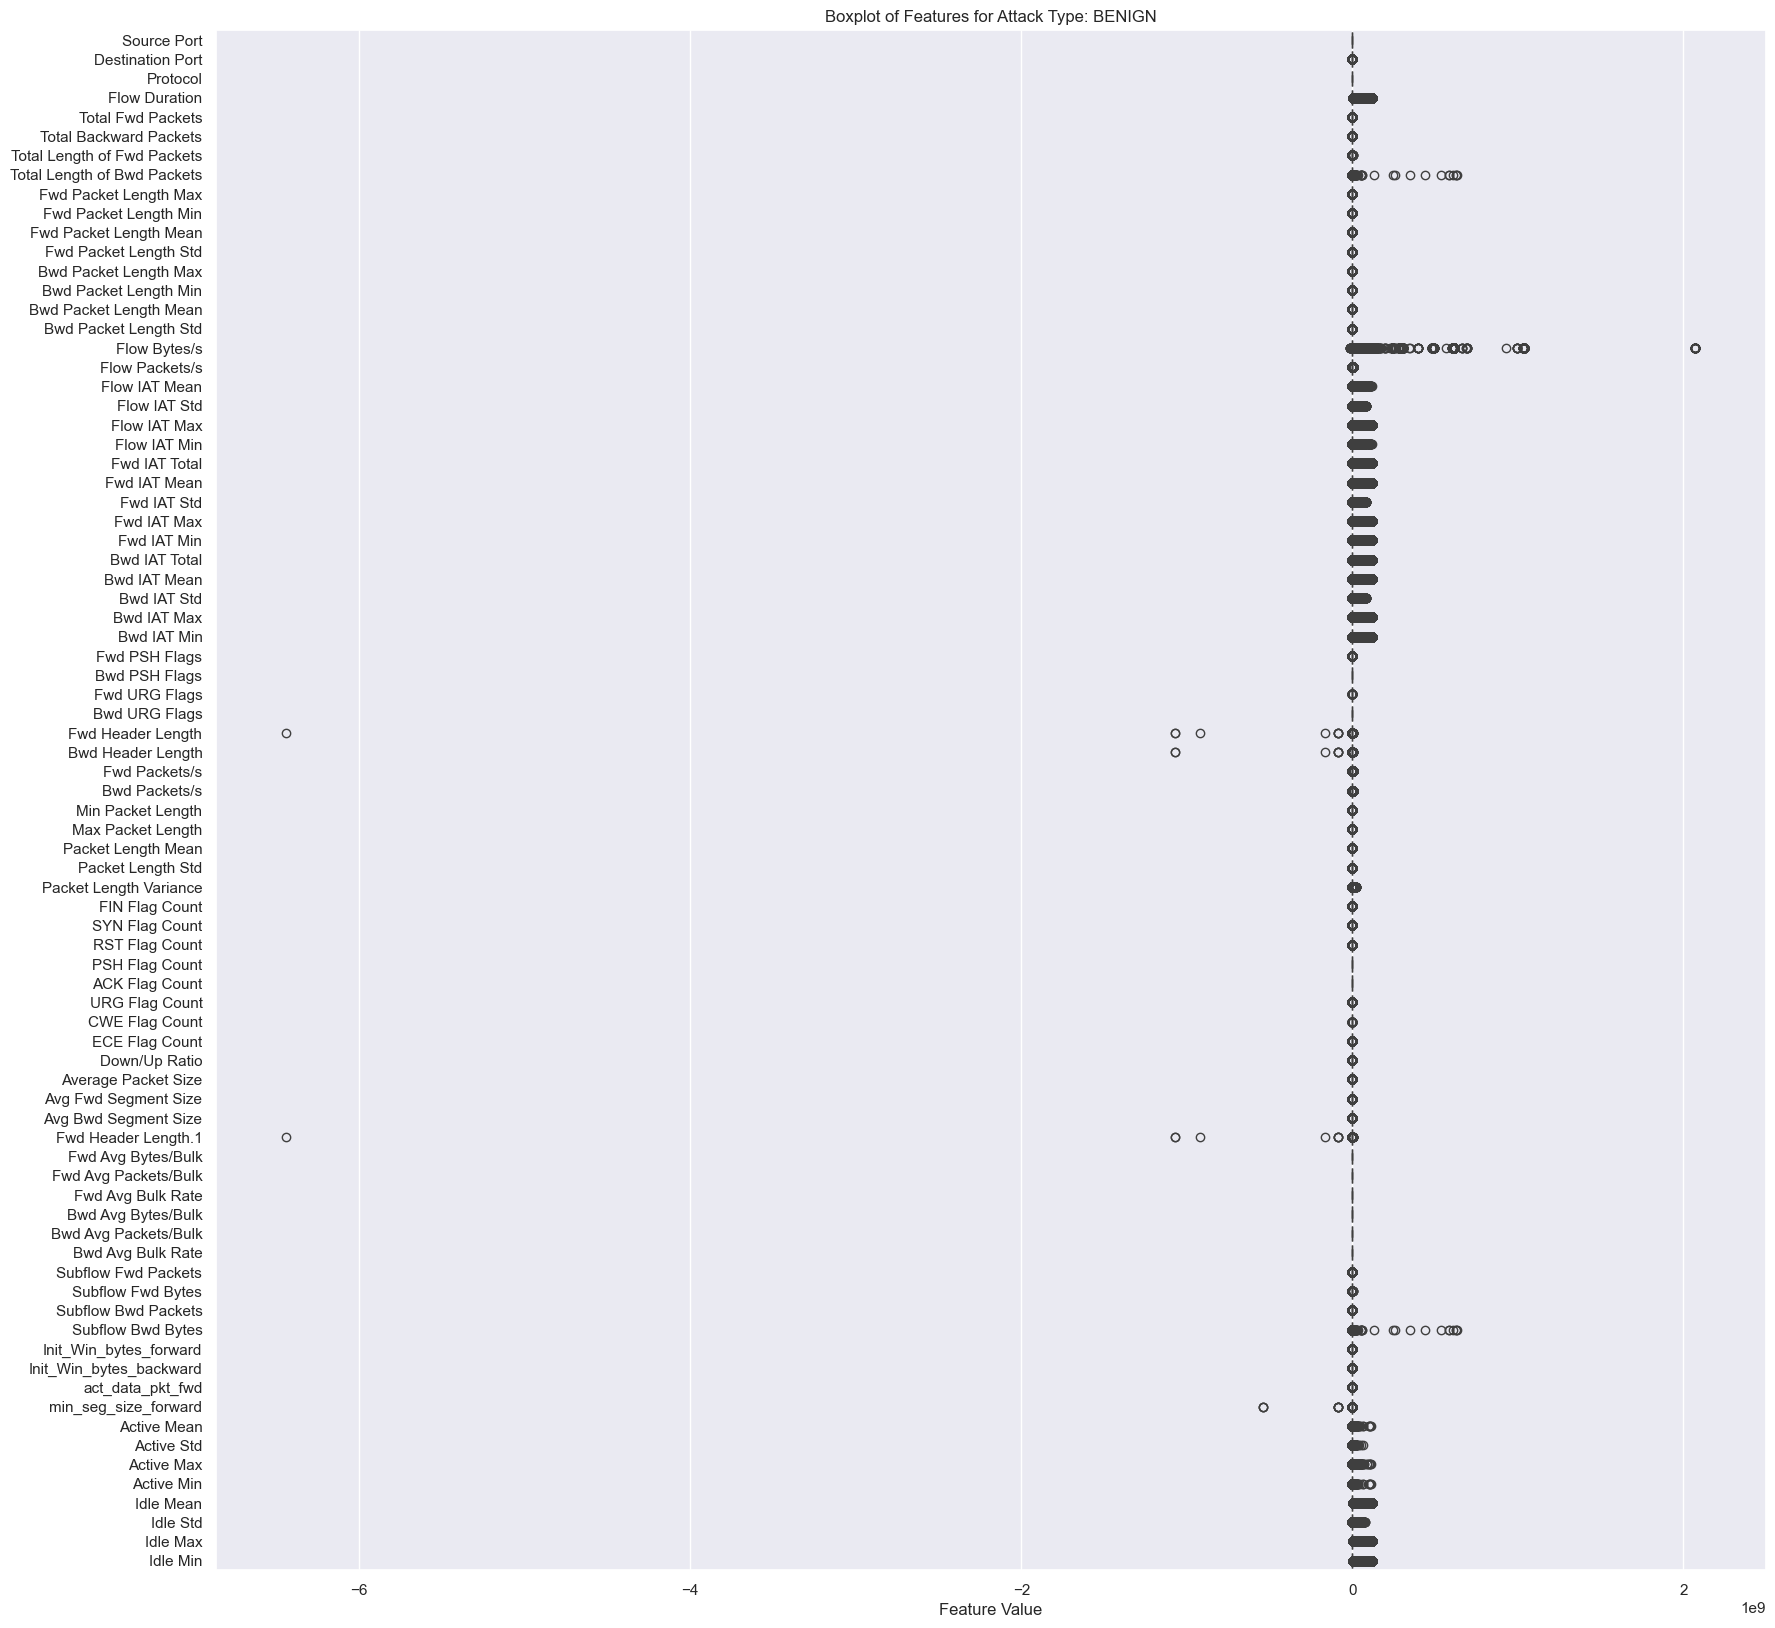

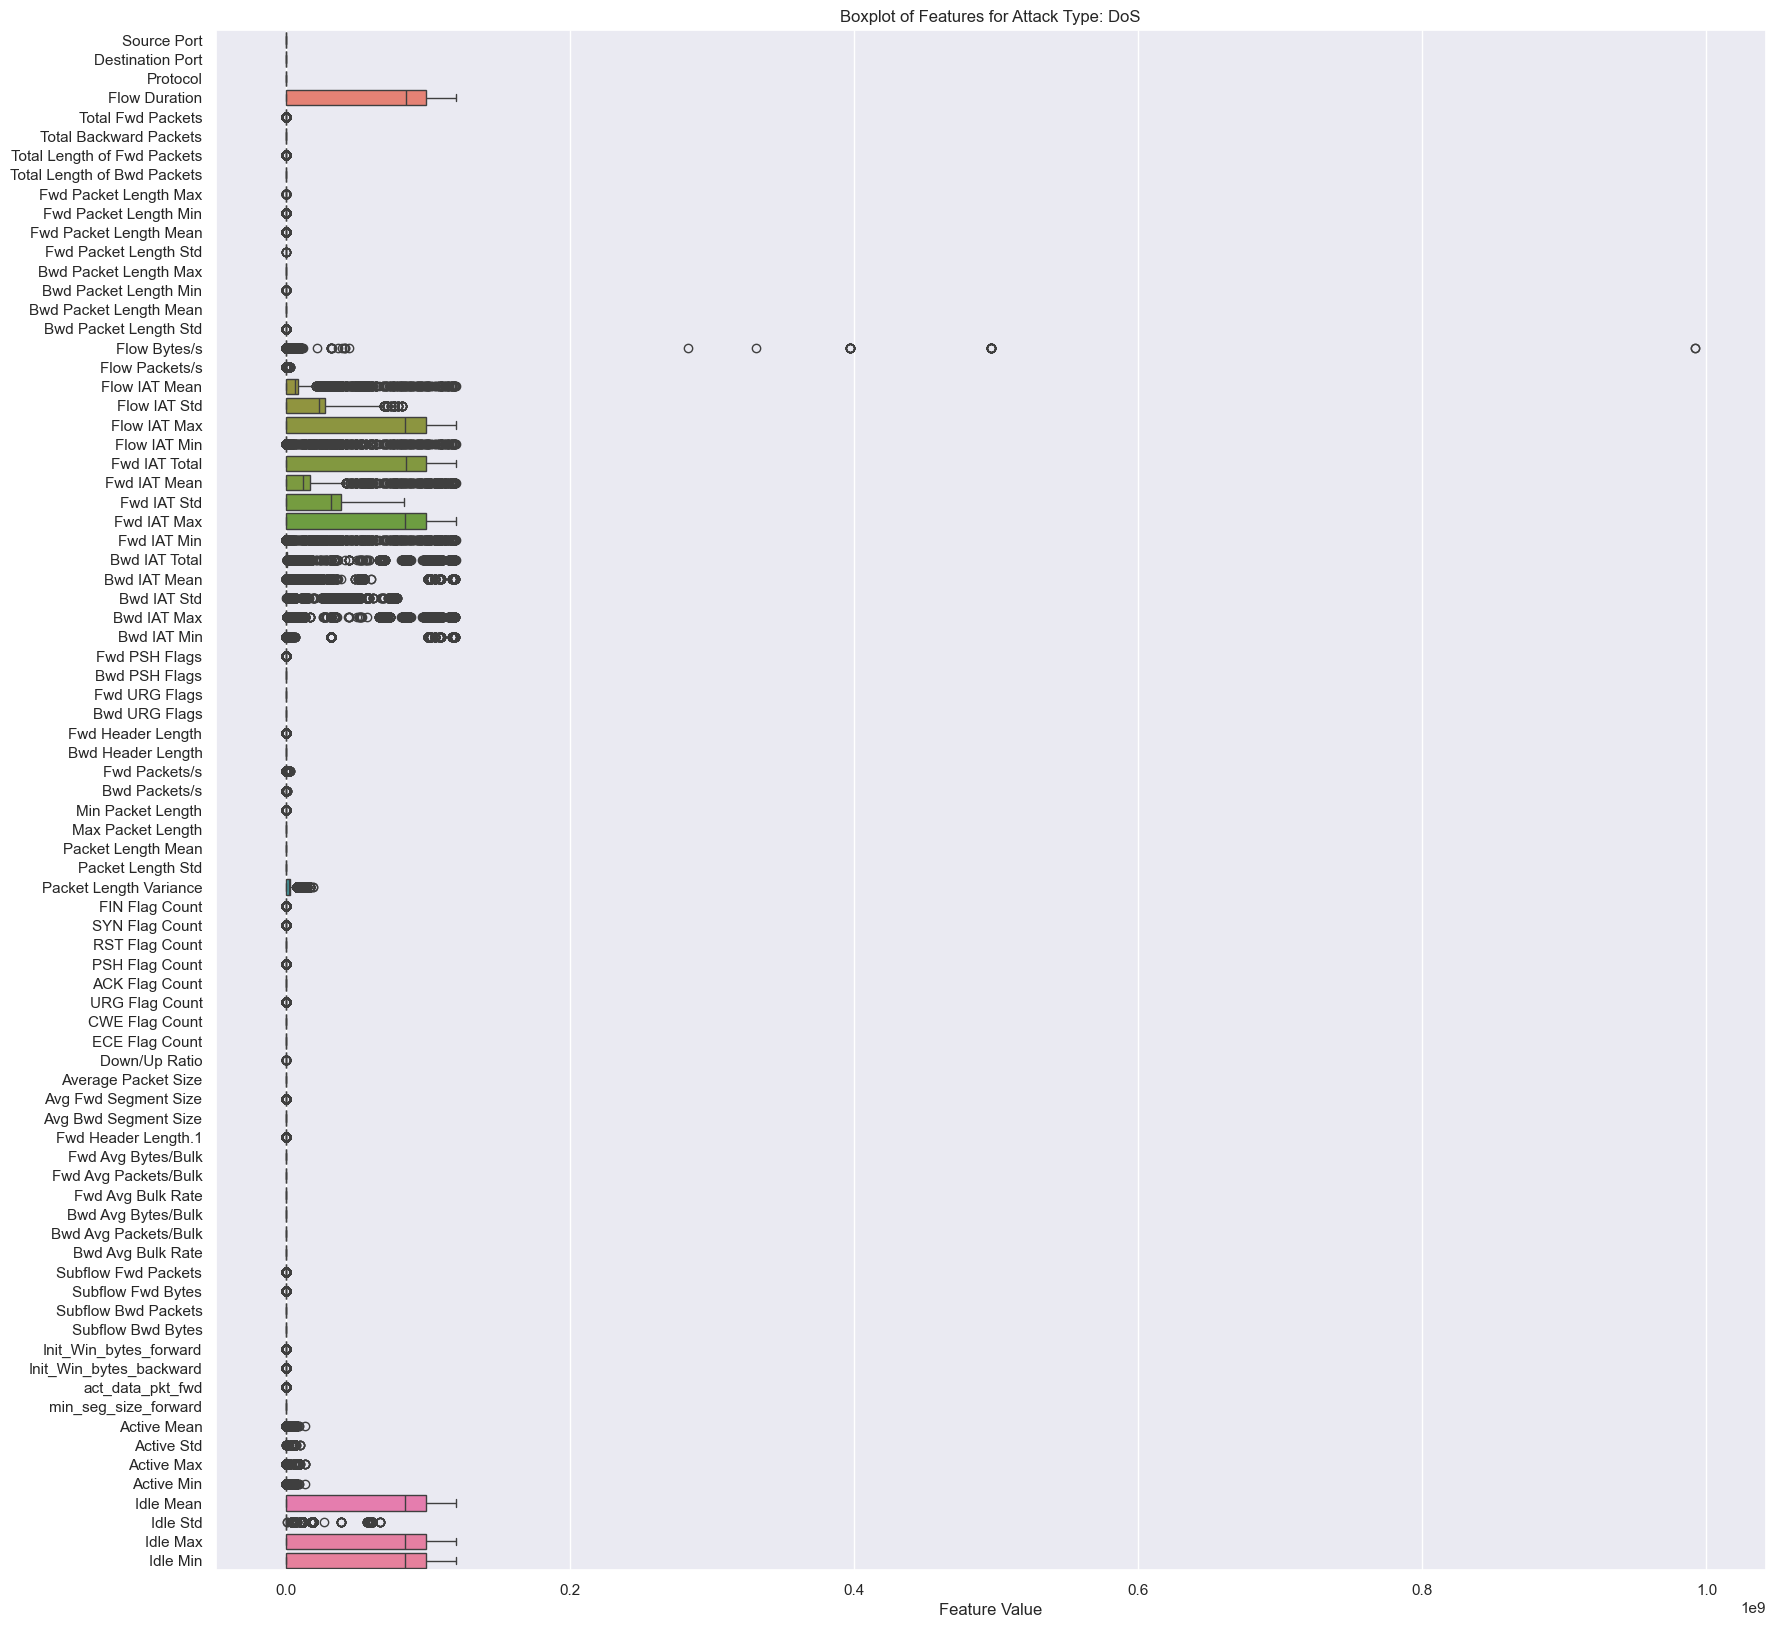

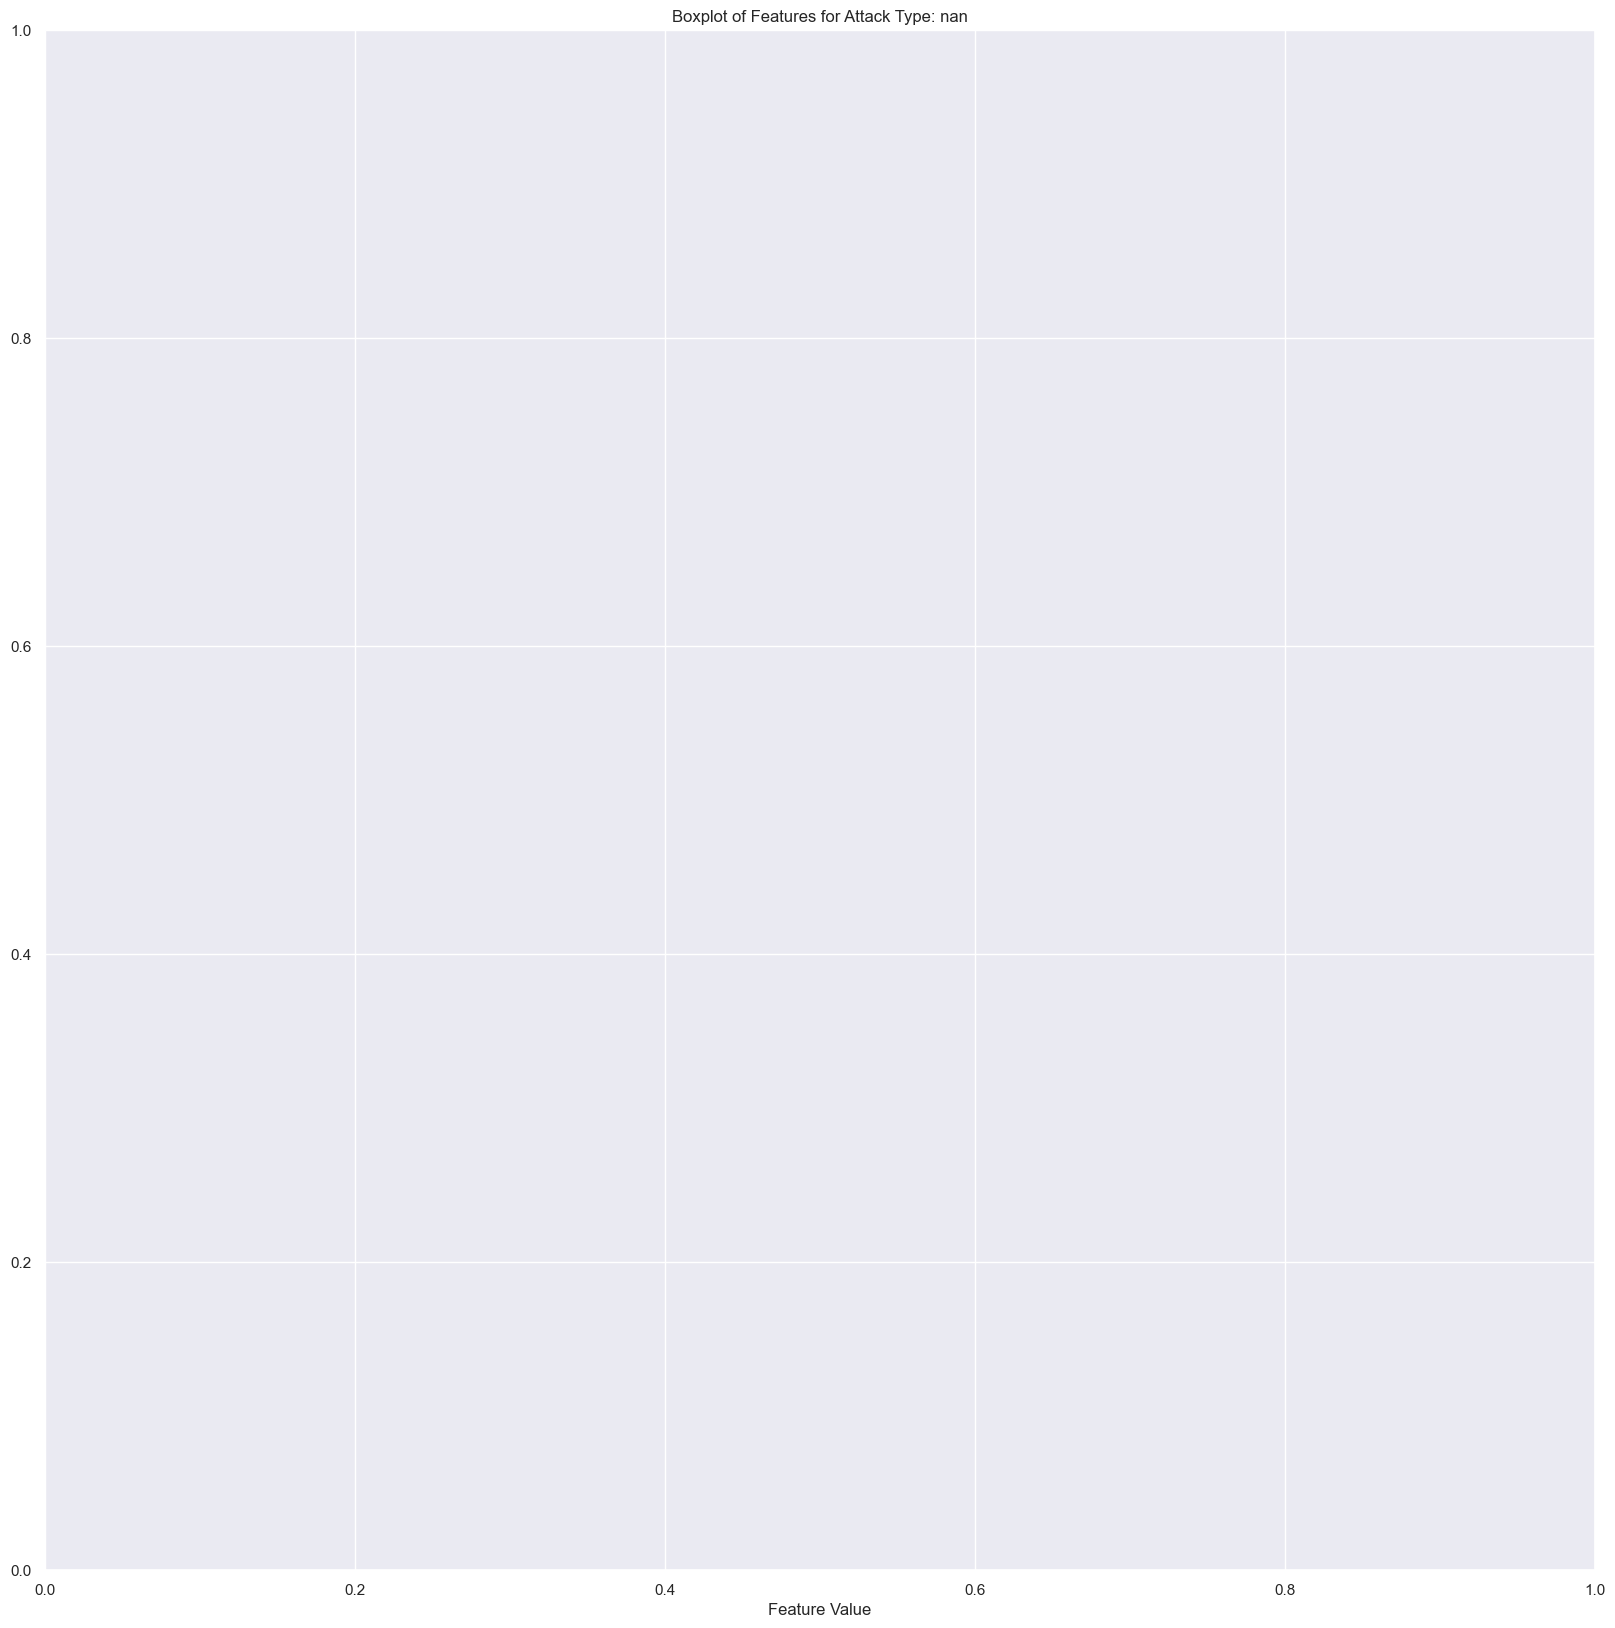

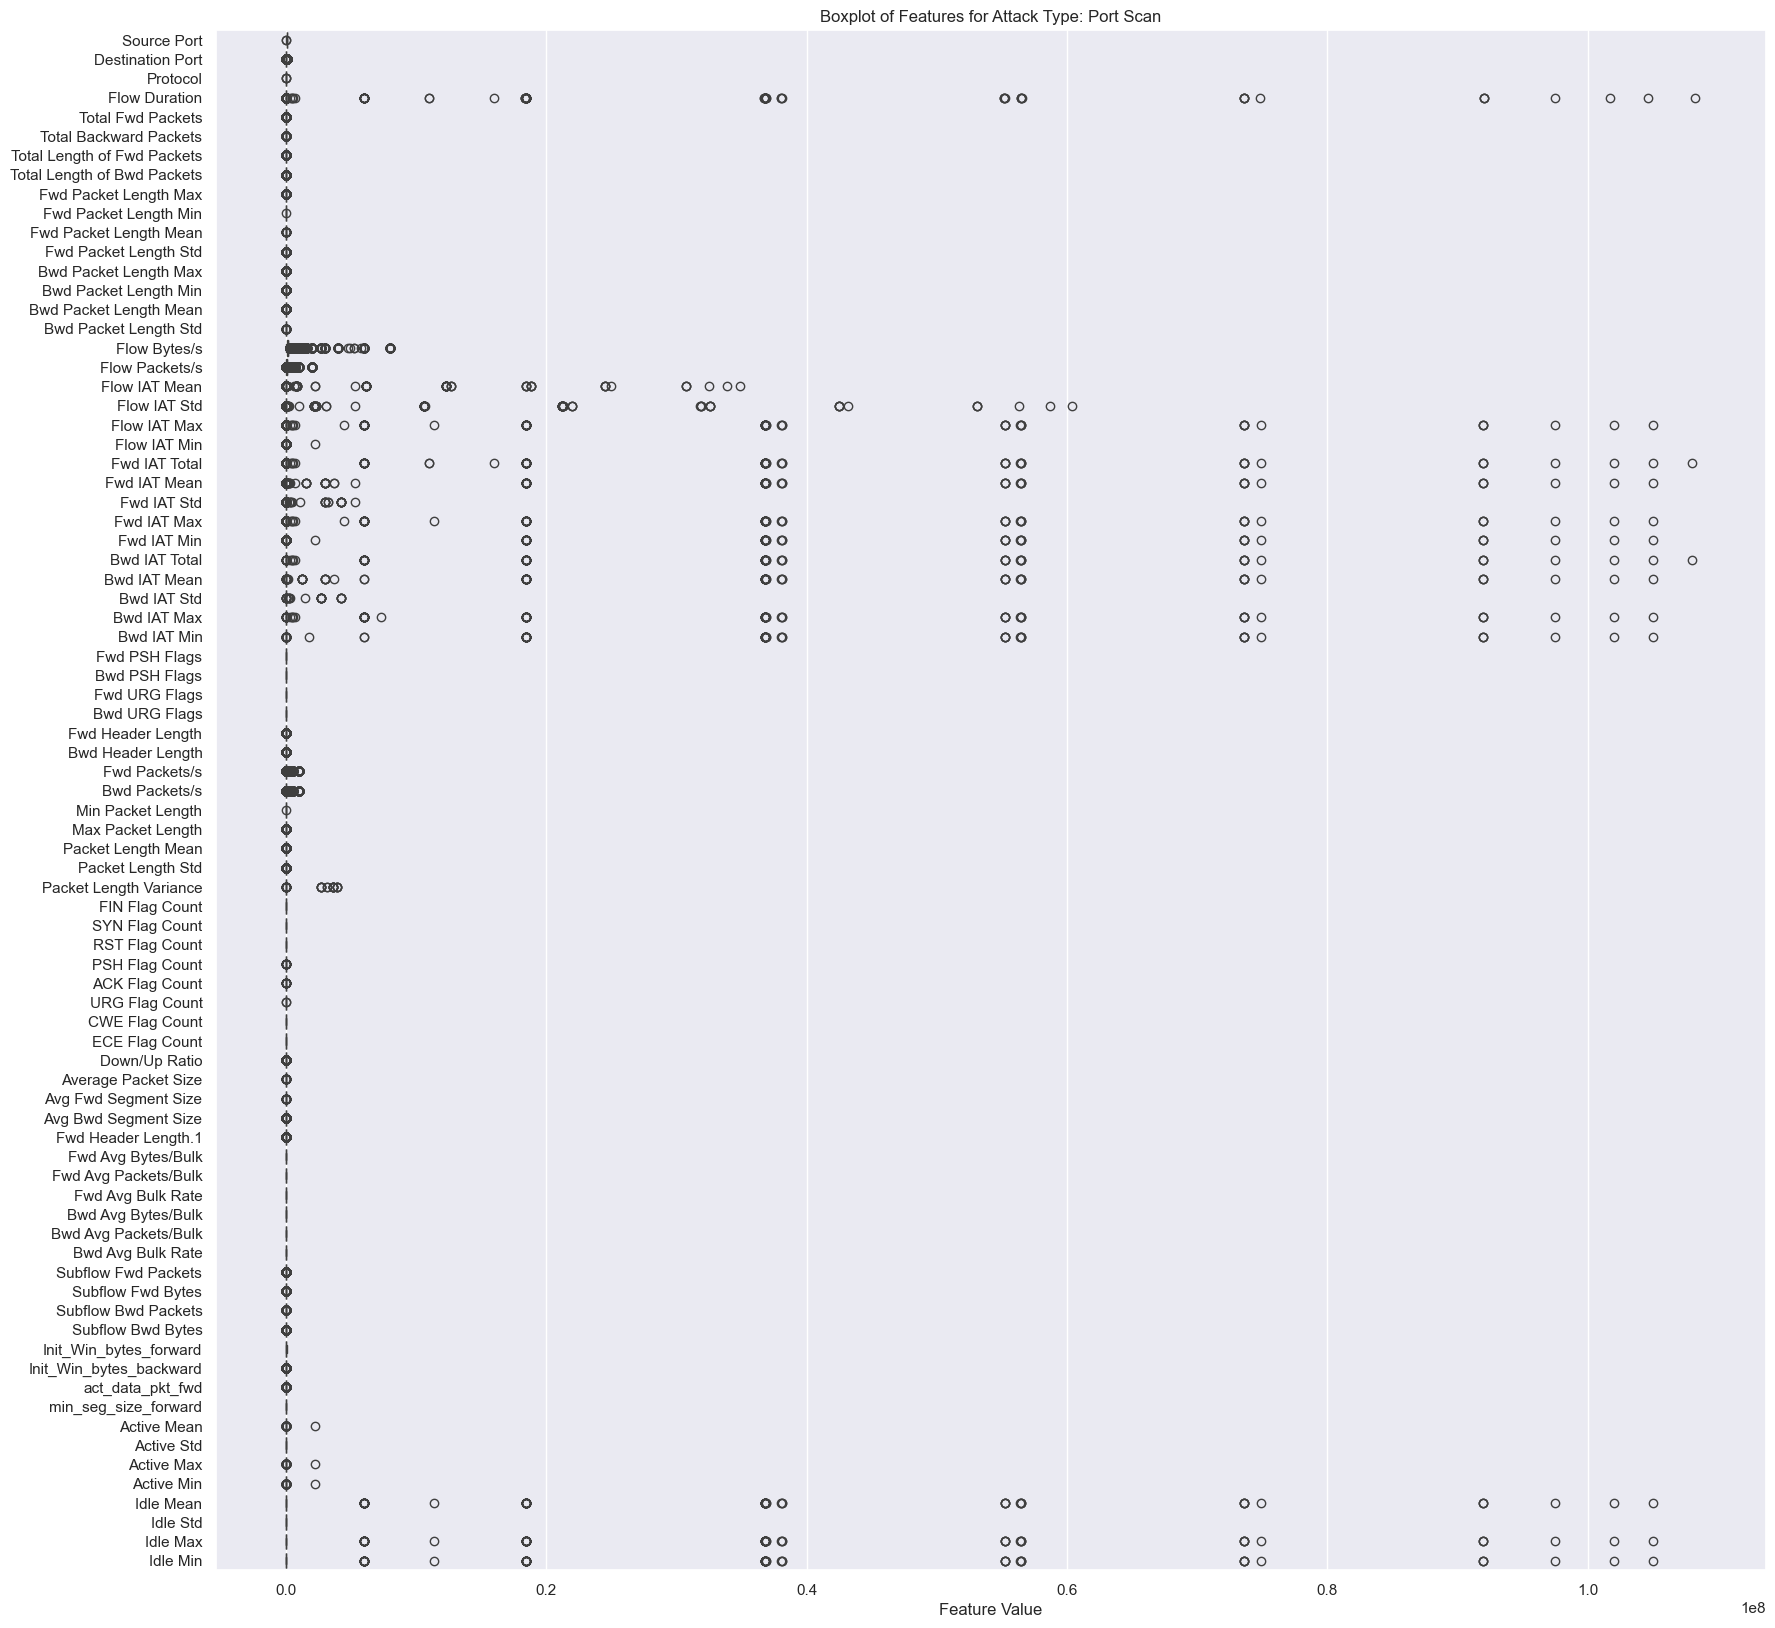

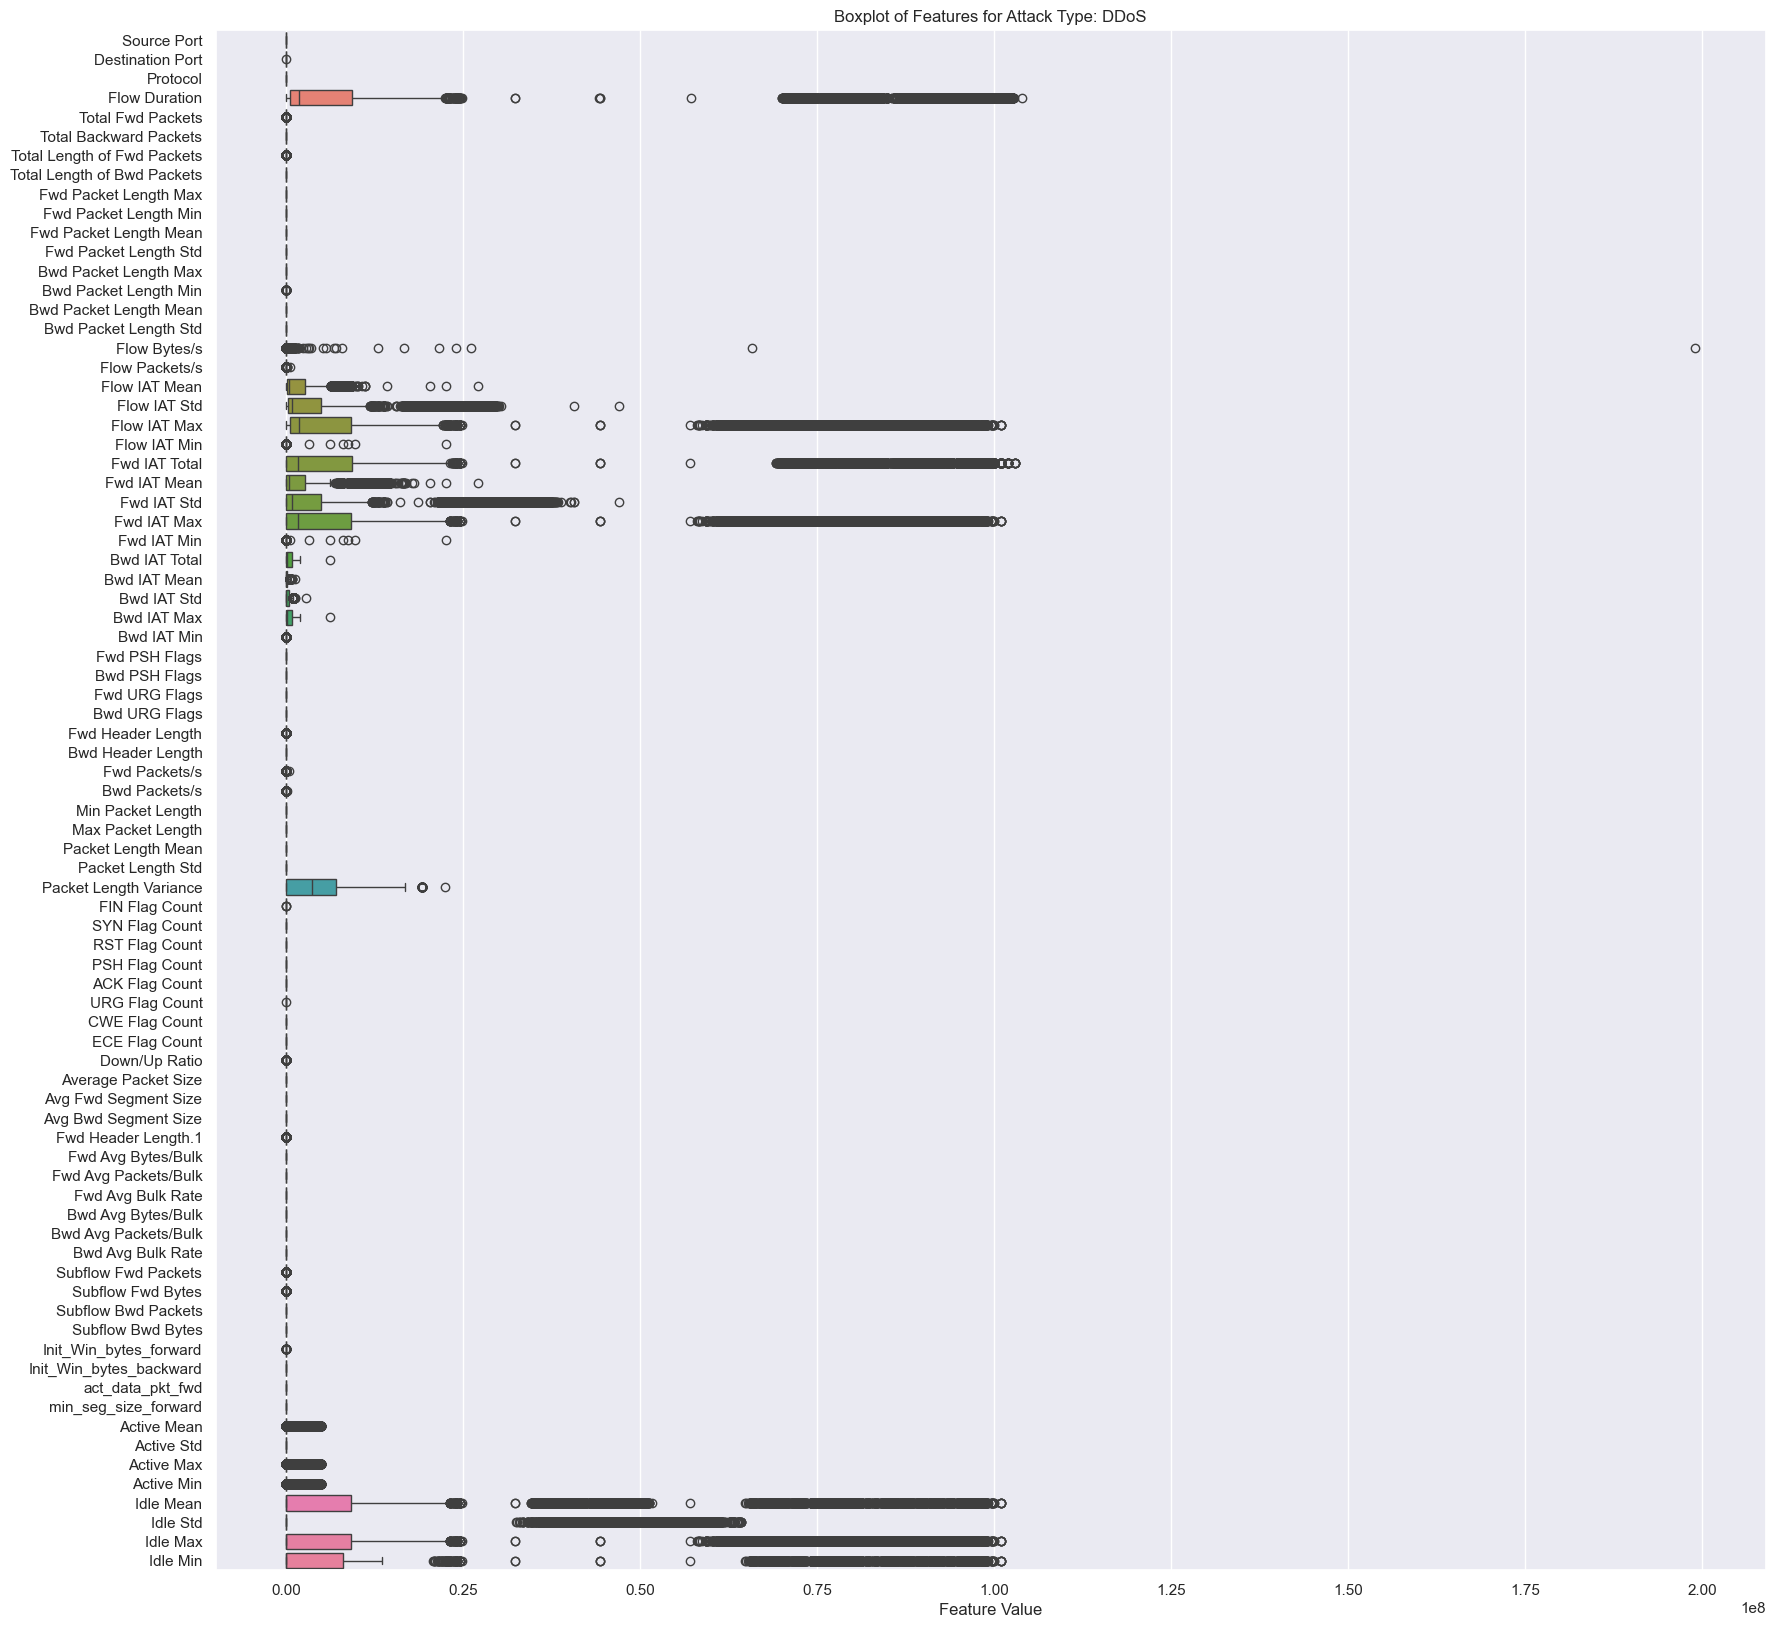

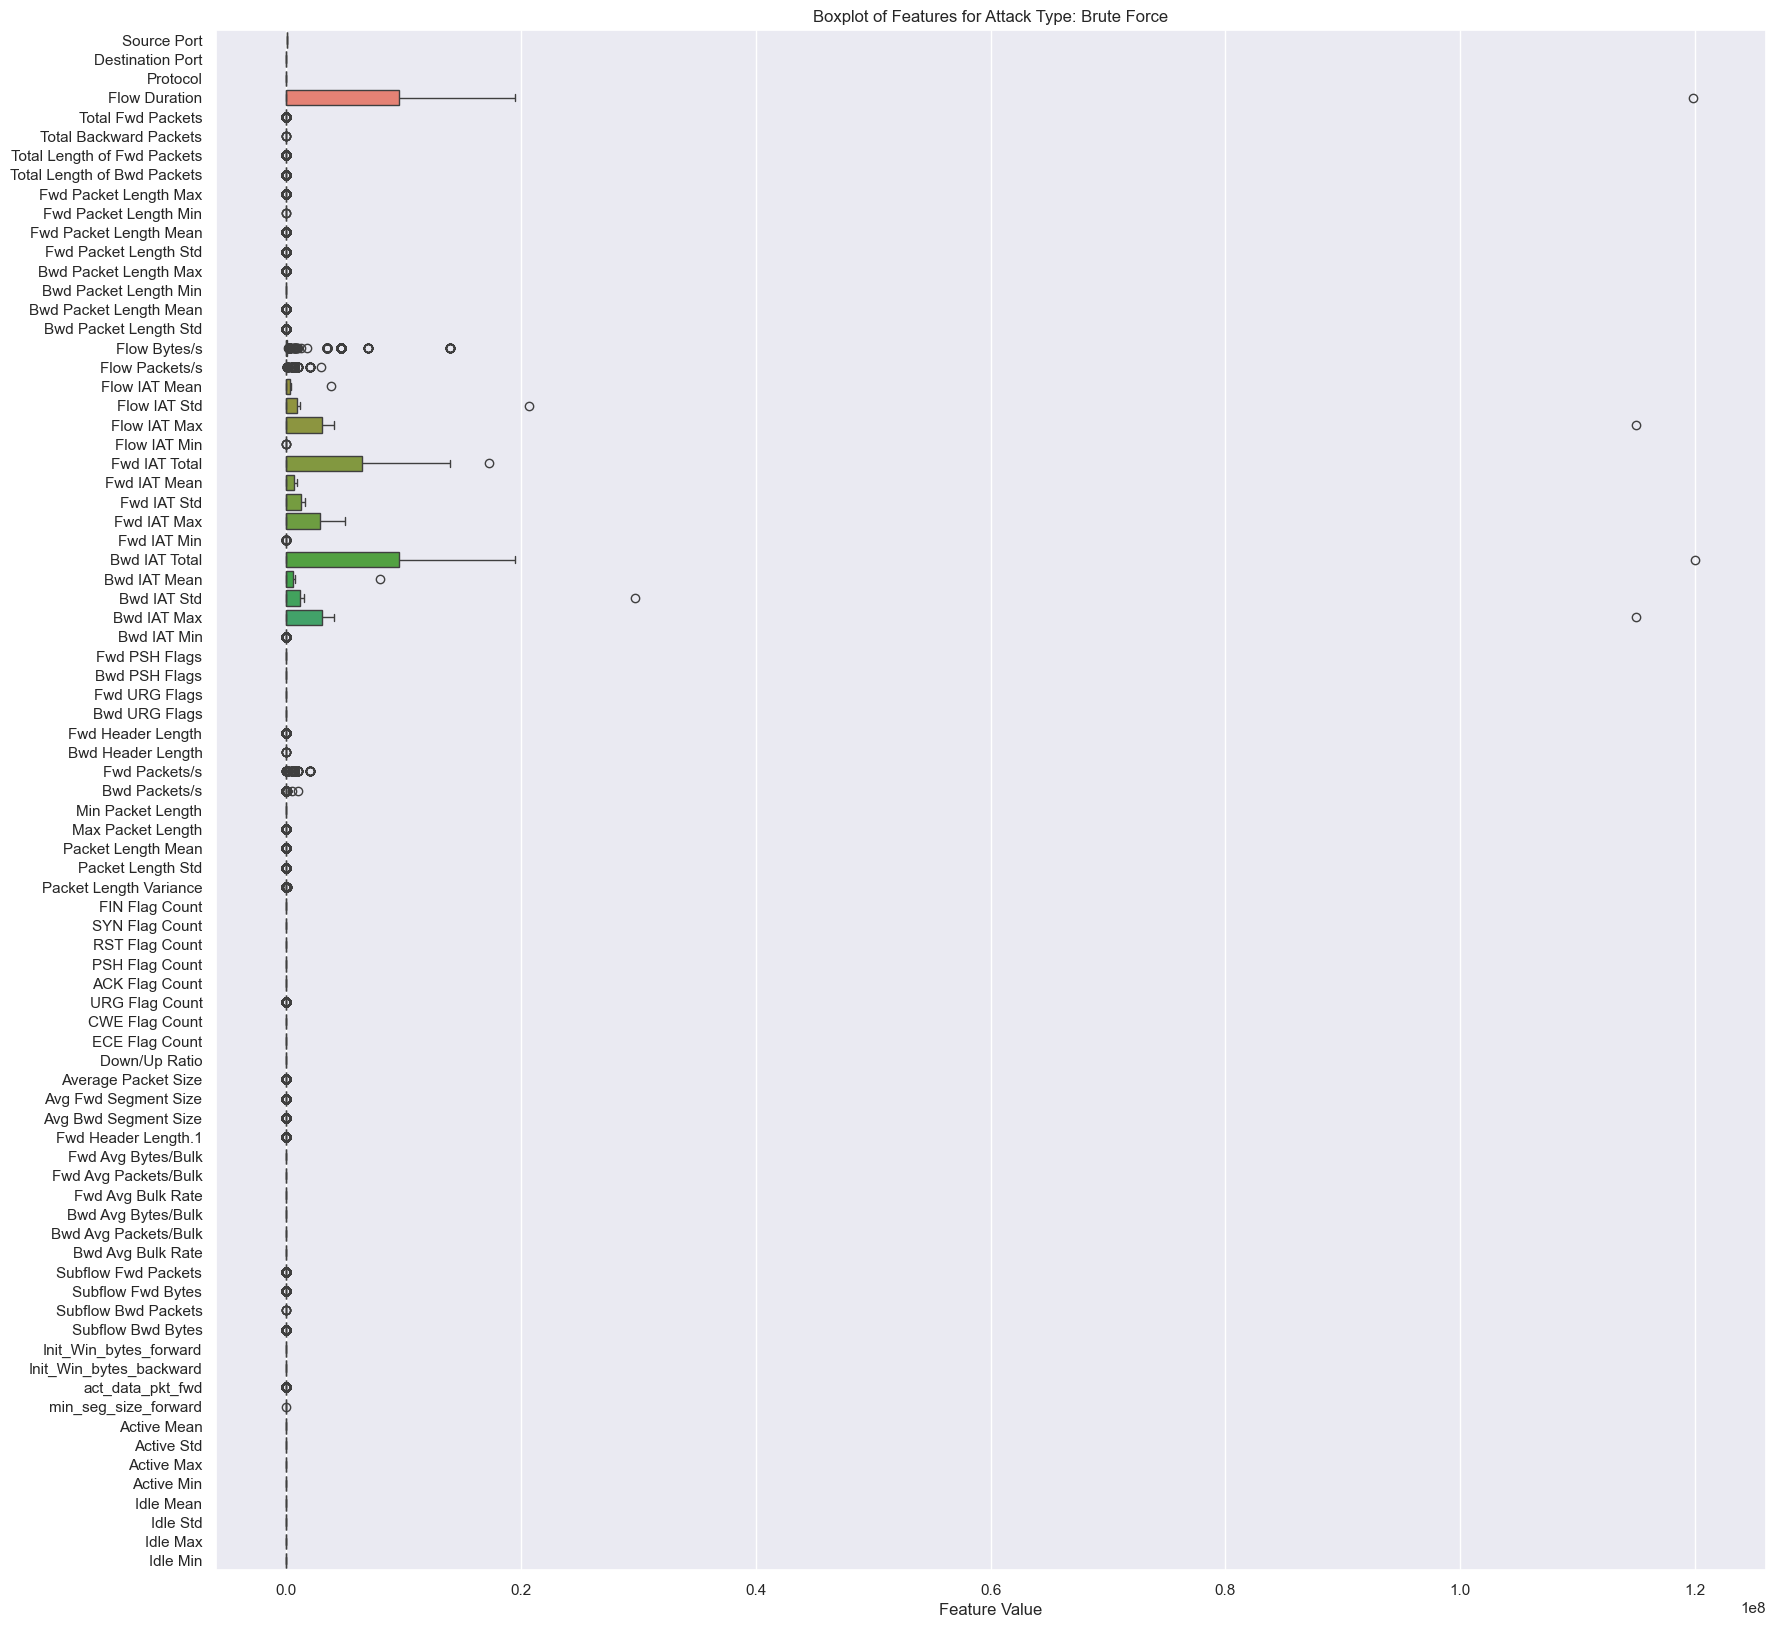

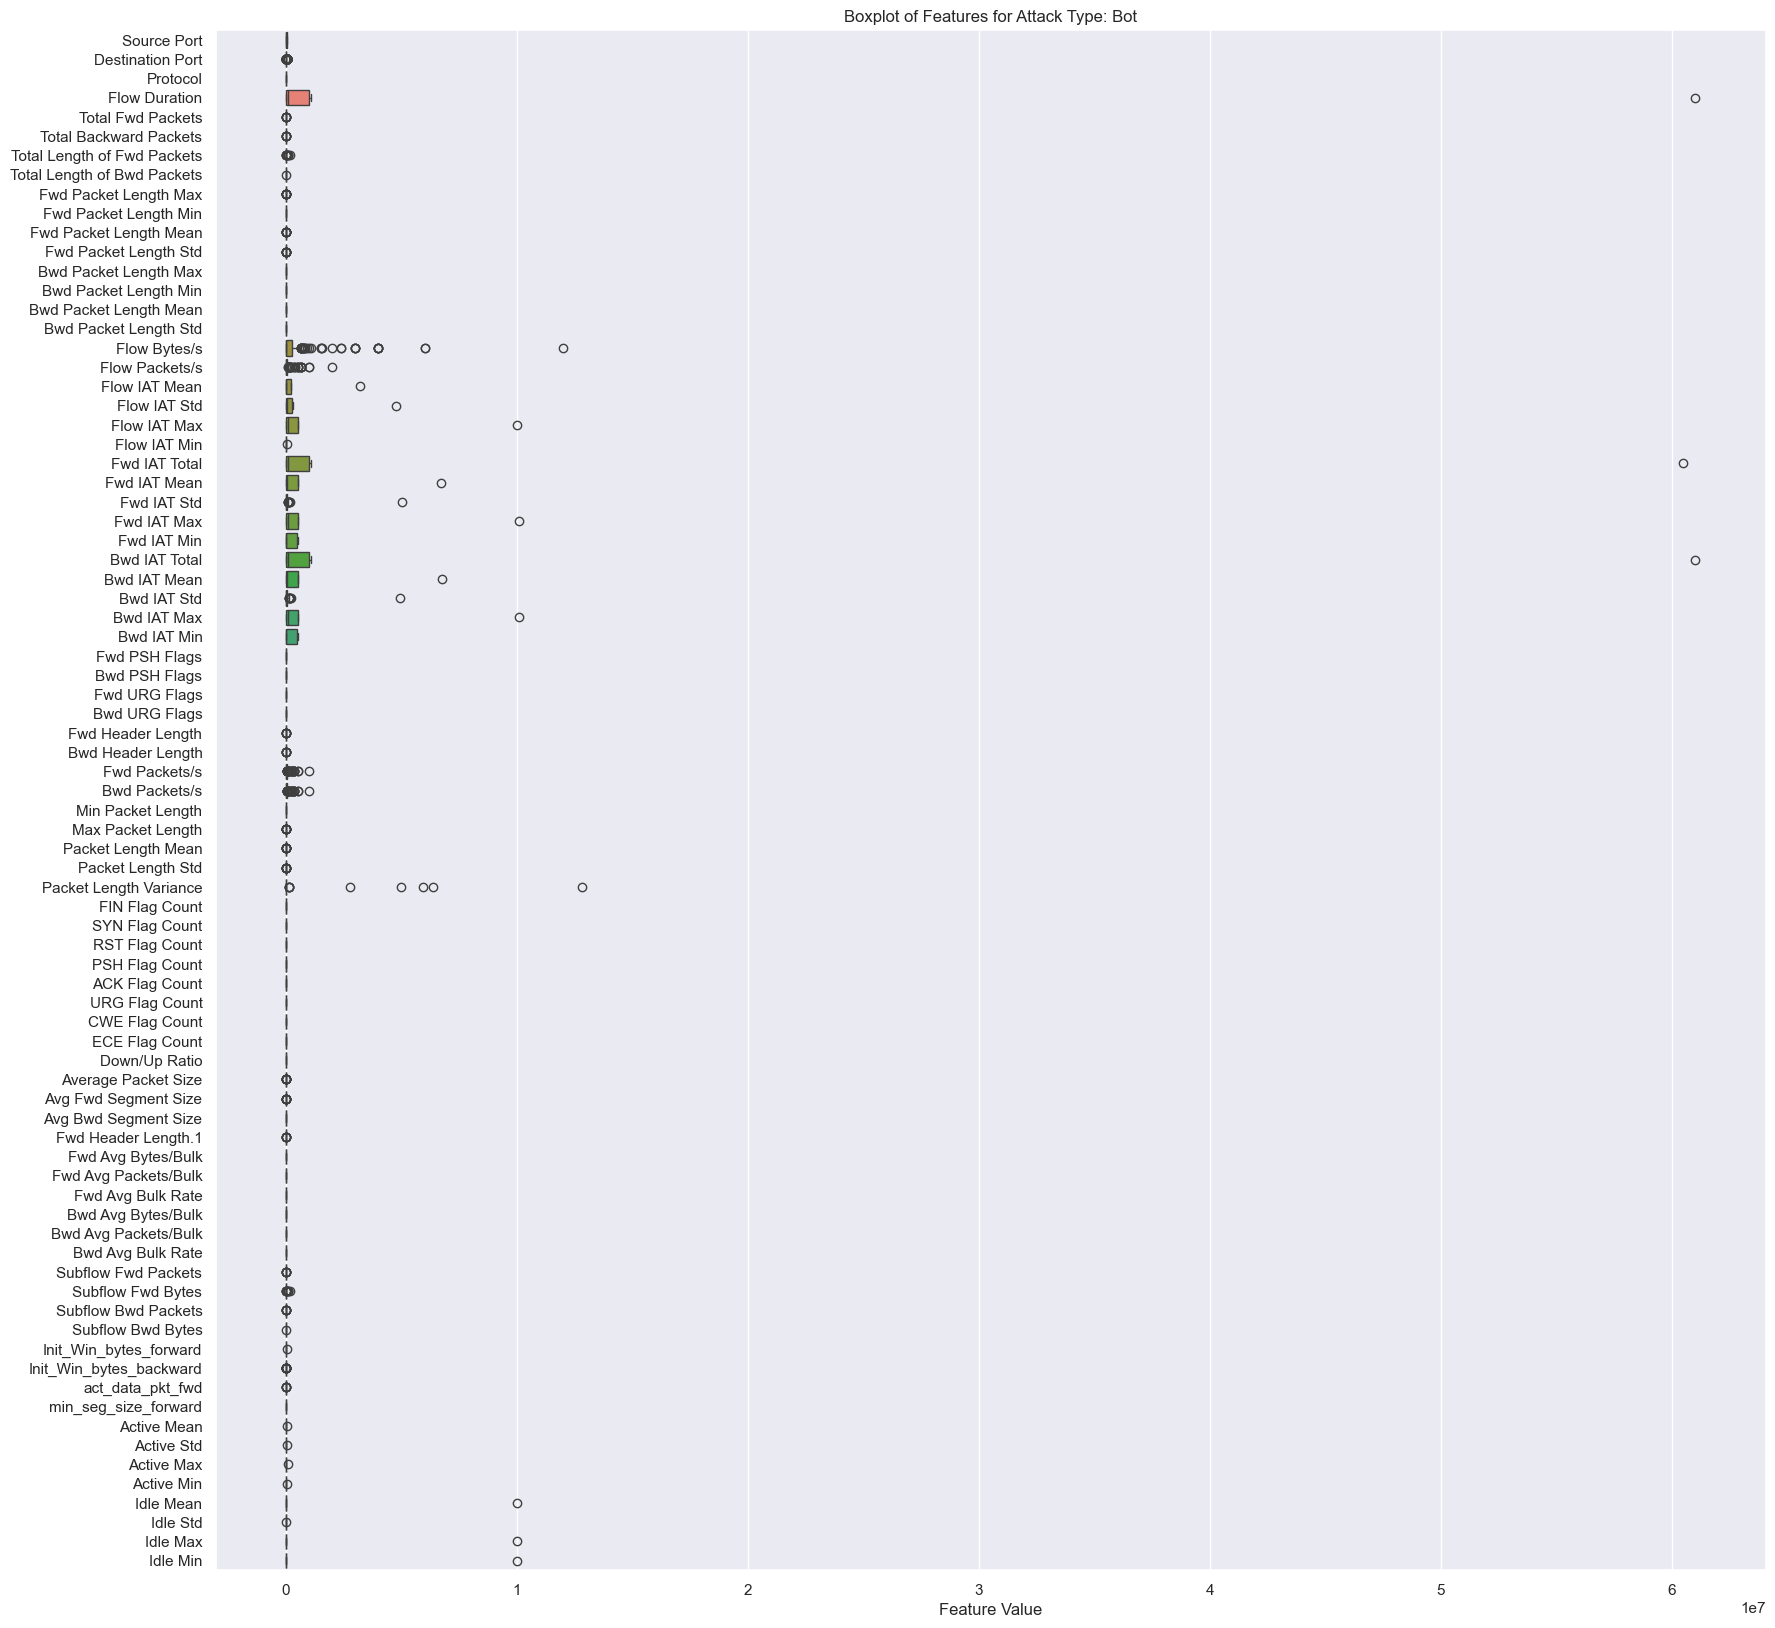

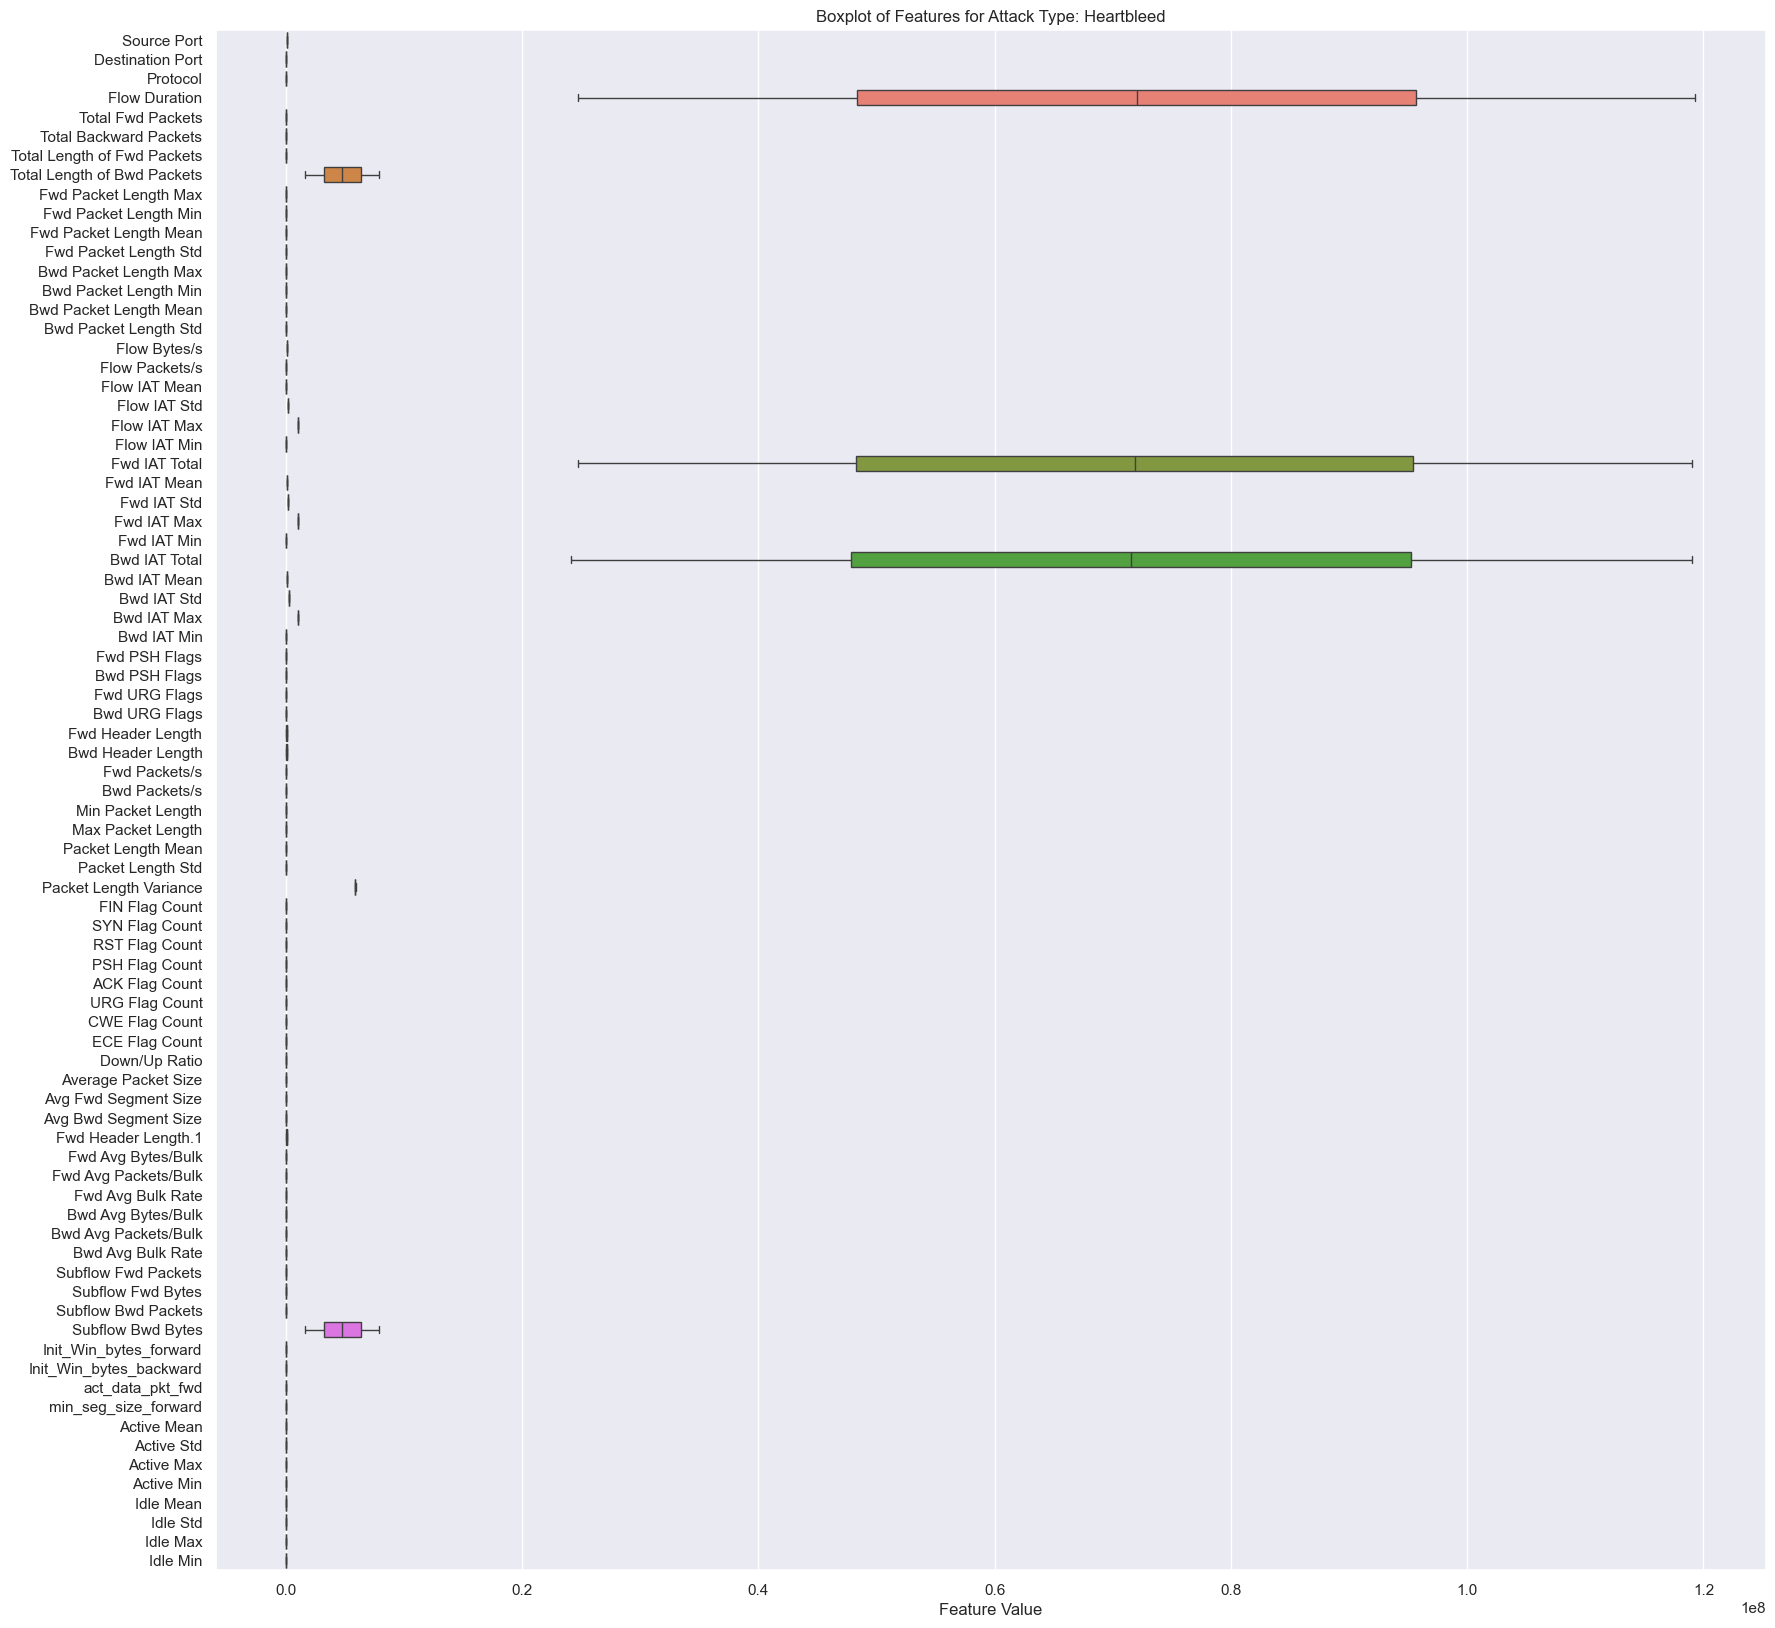

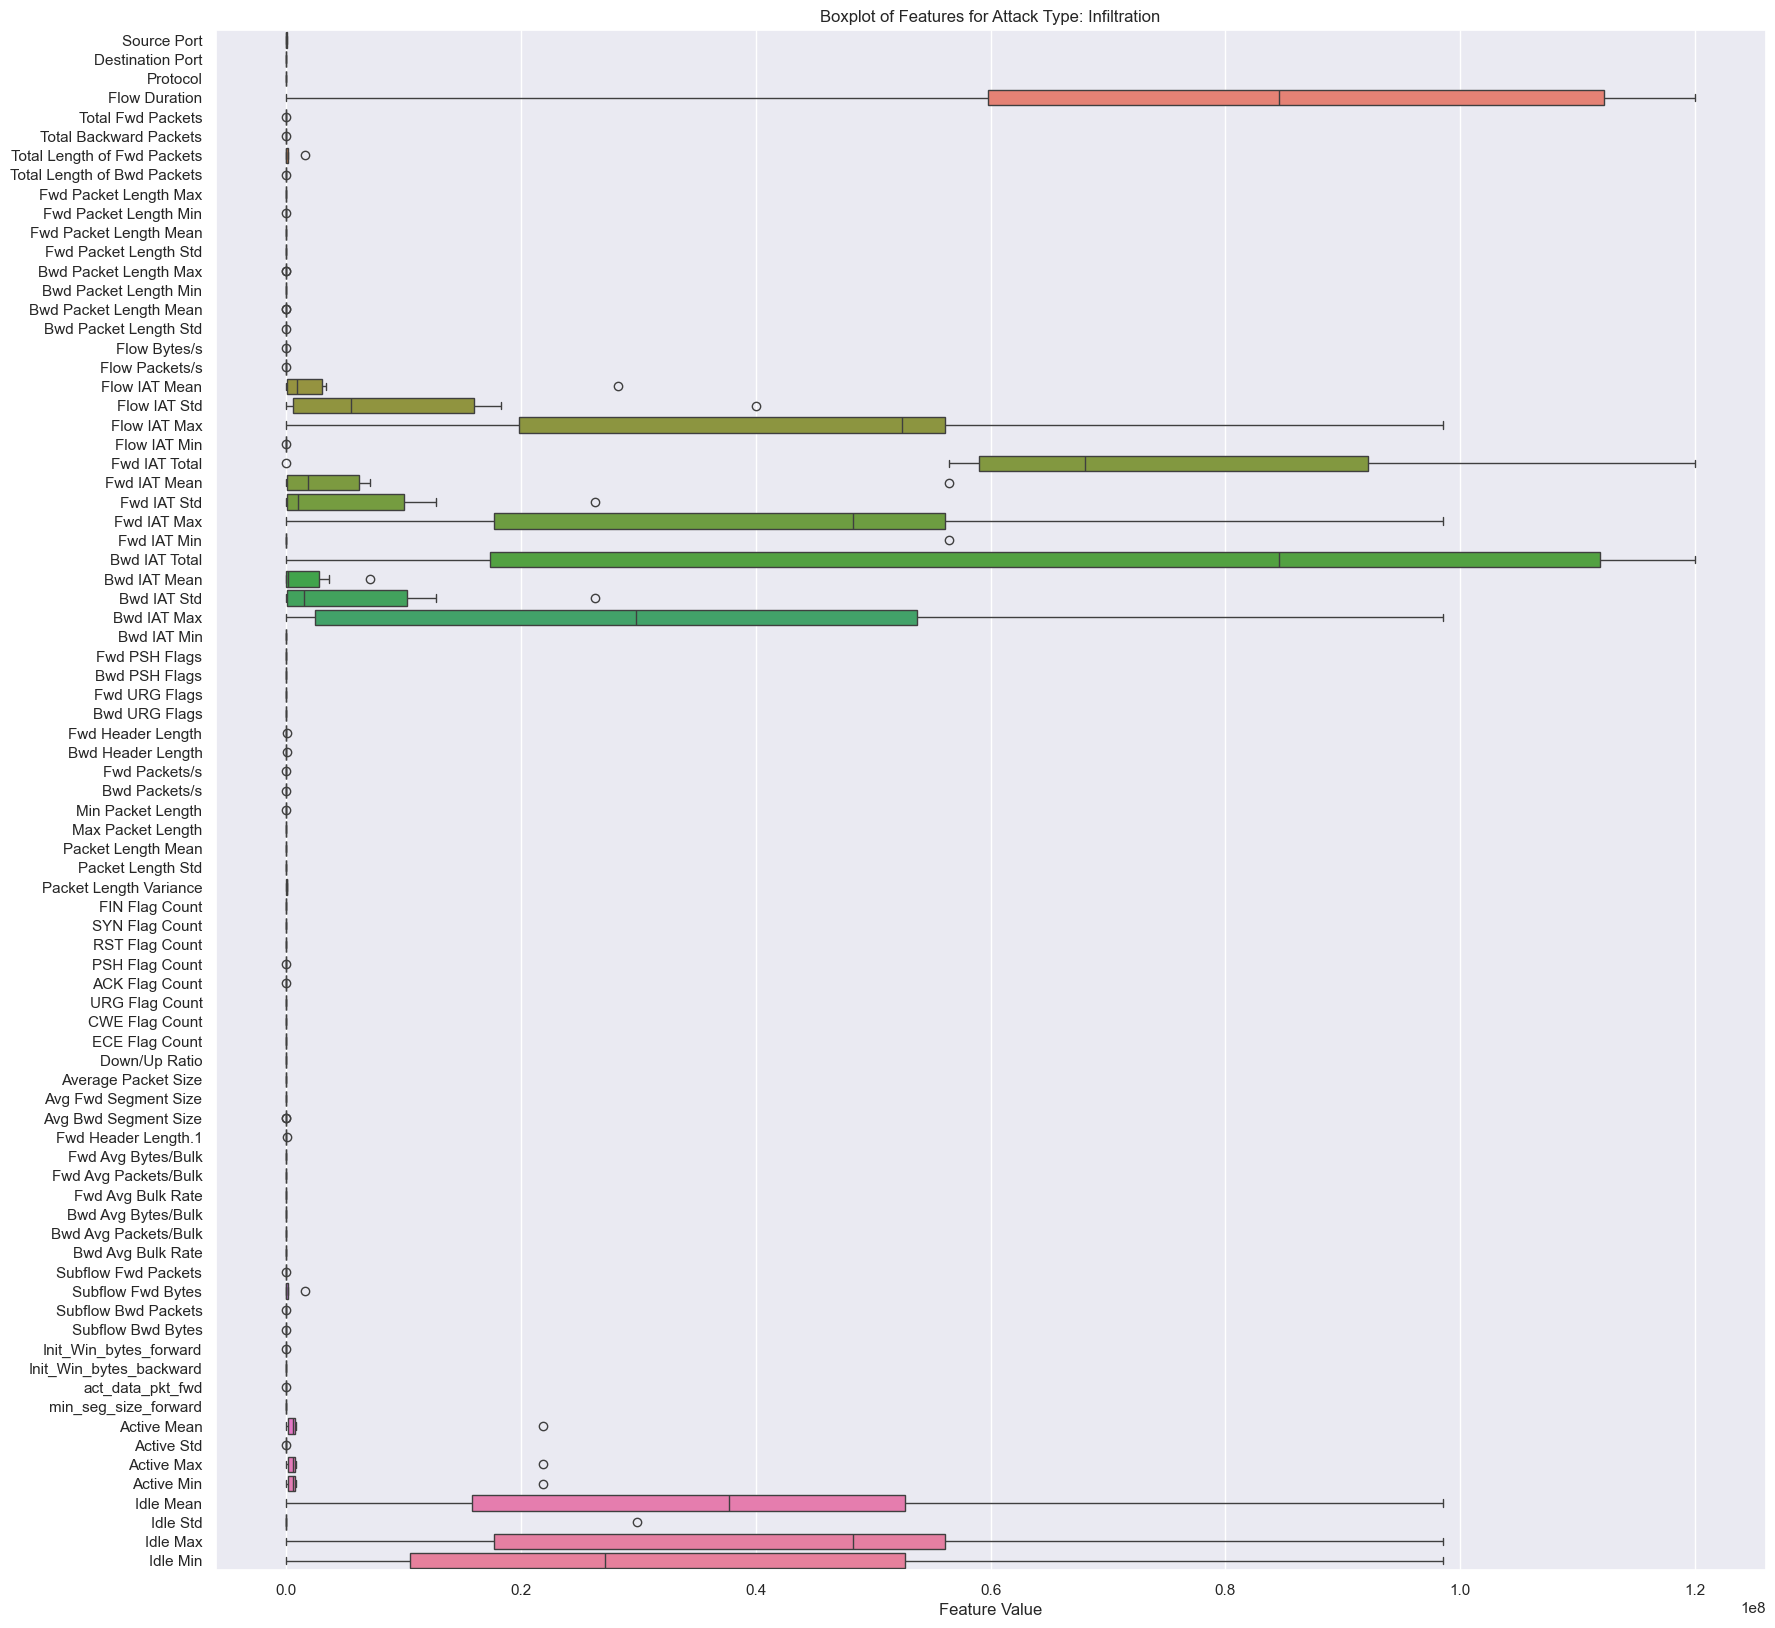

In [111]:

# Creating a boxplot for each attack type with the columns of sampled dataset
for attack_type in sampled_data['Attack Type'].unique():
    attack_data = sampled_data[sampled_data['Attack Type'] == attack_type]
    plt.figure(figsize=(20, 20))
    sns.boxplot(data = attack_data.drop(columns = ['Attack Type']), orient = 'h')
    plt.title(f'Boxplot of Features for Attack Type: {attack_type}')
    plt.xlabel('Feature Value')
    plt.show()